
# Analisi Covid_19 
##### Analisi a livello regionale:
* Ogni regione grafico singolo
* Todo: aggiungere mortalità per regione
##### Analisi a livello nazionale
* Casi totali Italia
* Aggiungere proporzione guariti/terapia intensiva

#### TODO:
* Generazione giornalieria automatica
* Devo aggiustare il codice che è disordinato e senza commenti
* Scrivere un Readme.md come si deve

In [11]:
# Importo librerie e apro primo .csv (livello regionale)

import pandas as pd
import matplotlib.pyplot as plt
import pylab
df = pd.read_csv('COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv')

In [12]:
# Lista regioni

regione_tot = ['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania', 'Emilia Romagna', 
               'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 
               'Sardegna', 'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta", 'Veneto'
]
df.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare',
       'totale_attualmente_positivi', 'nuovi_attualmente_positivi',
       'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi'],
      dtype='object')

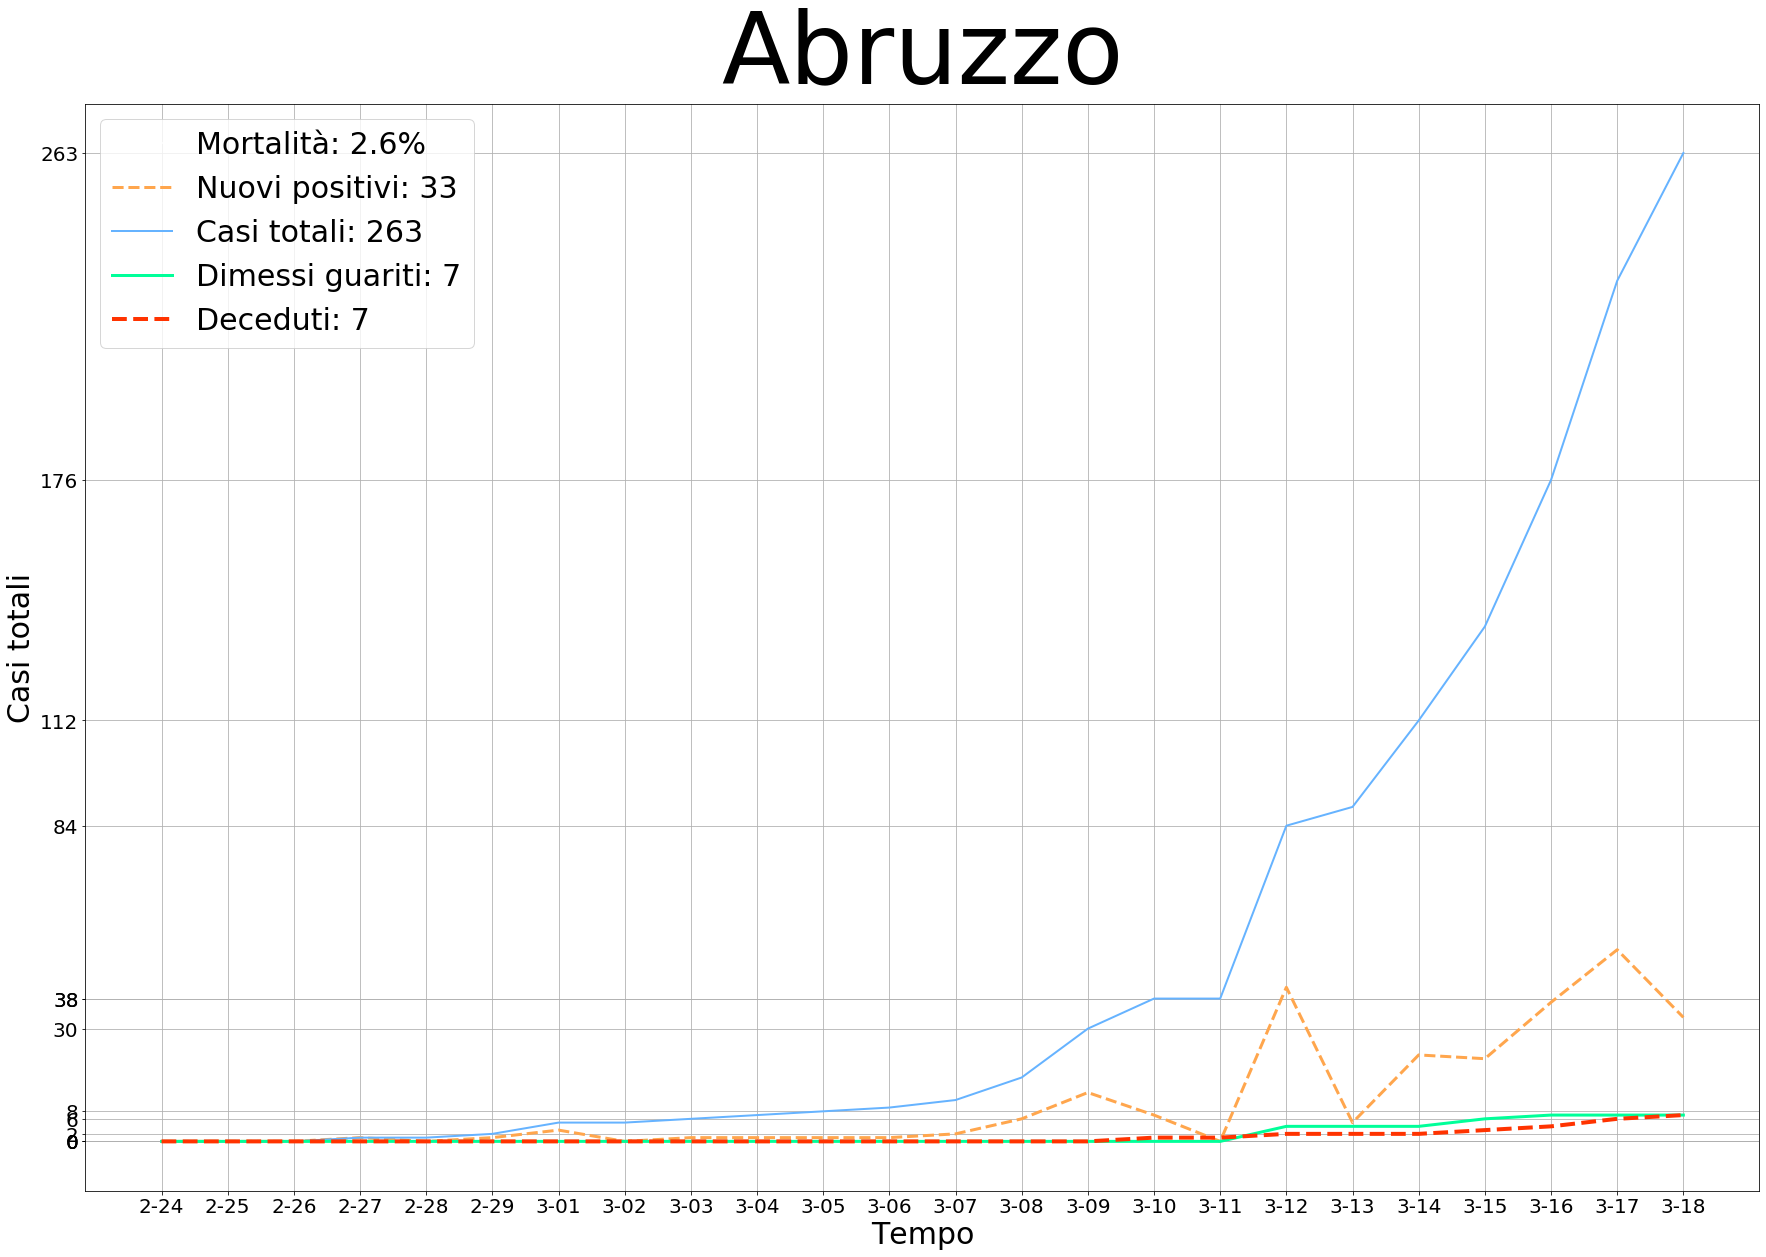

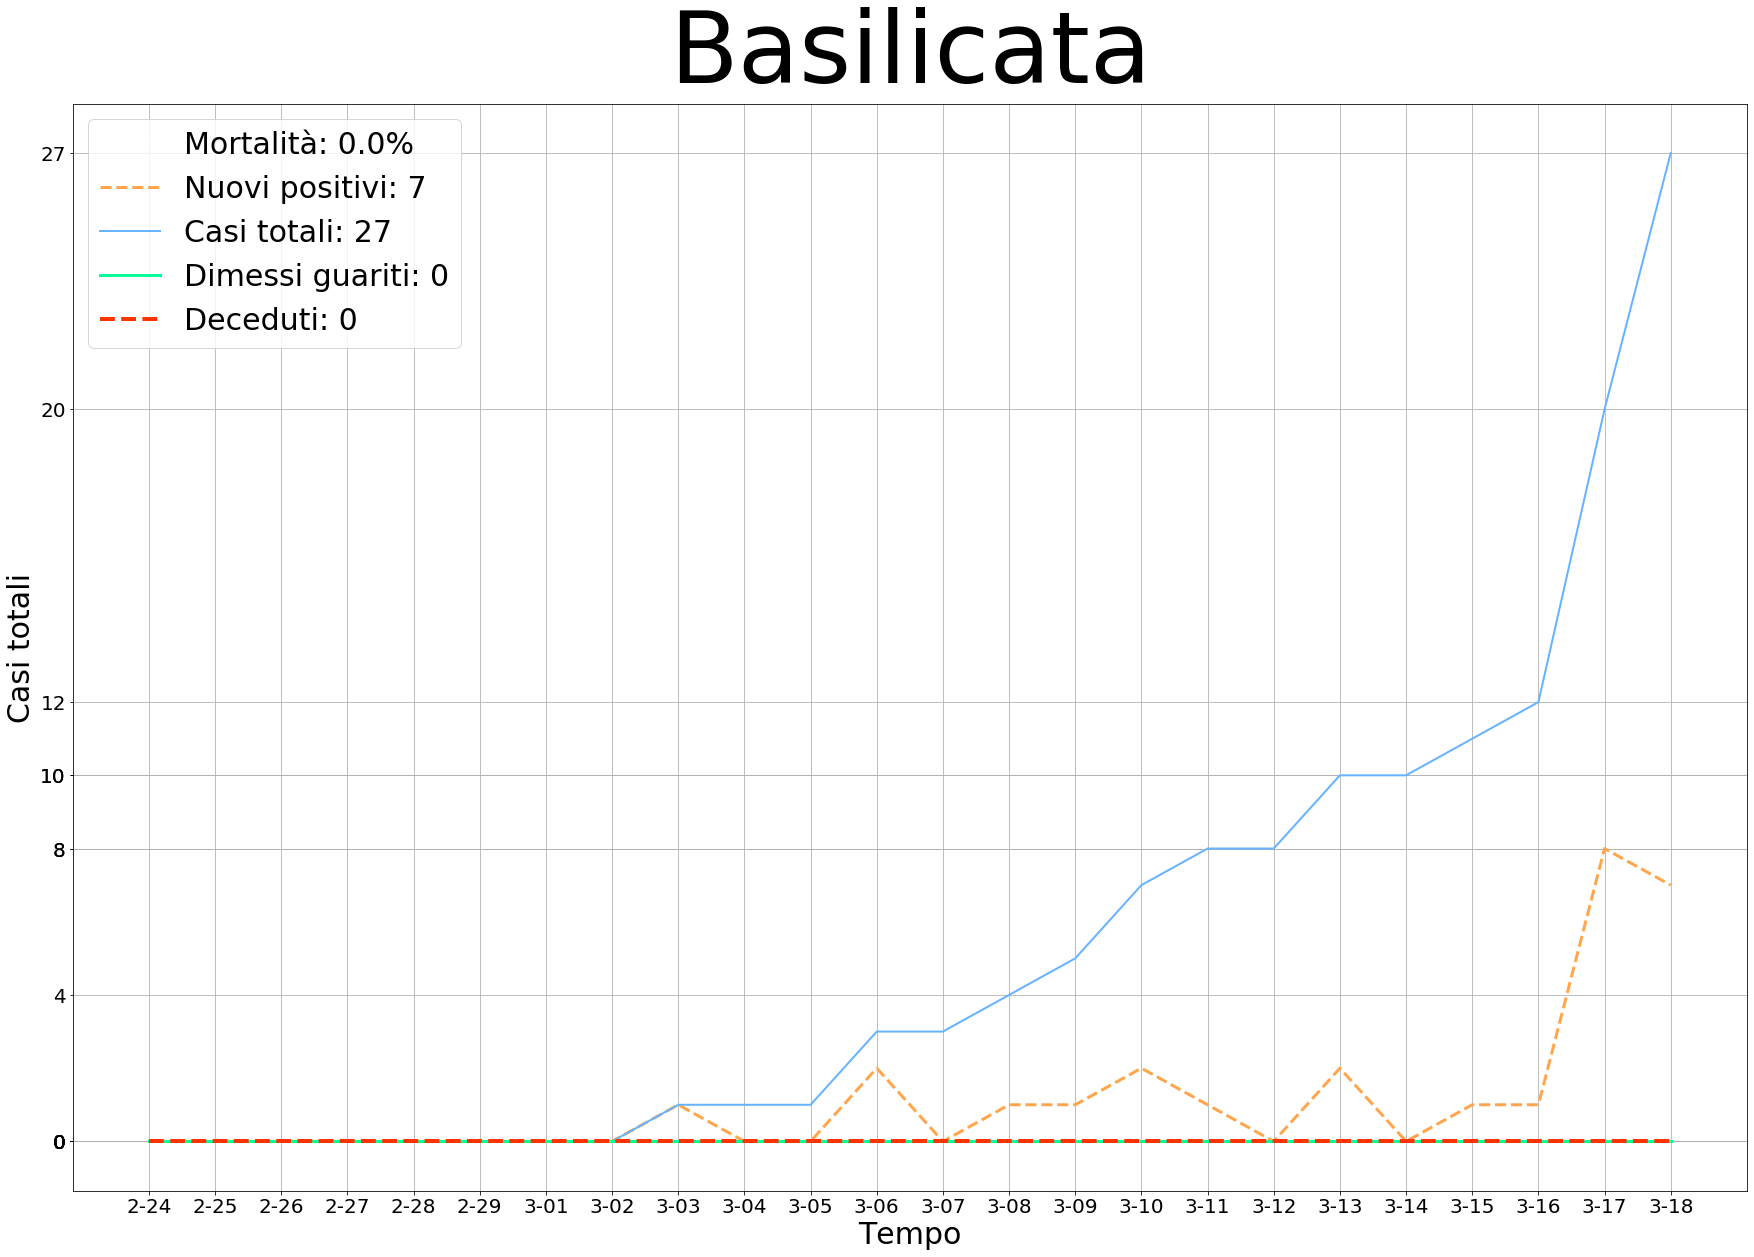

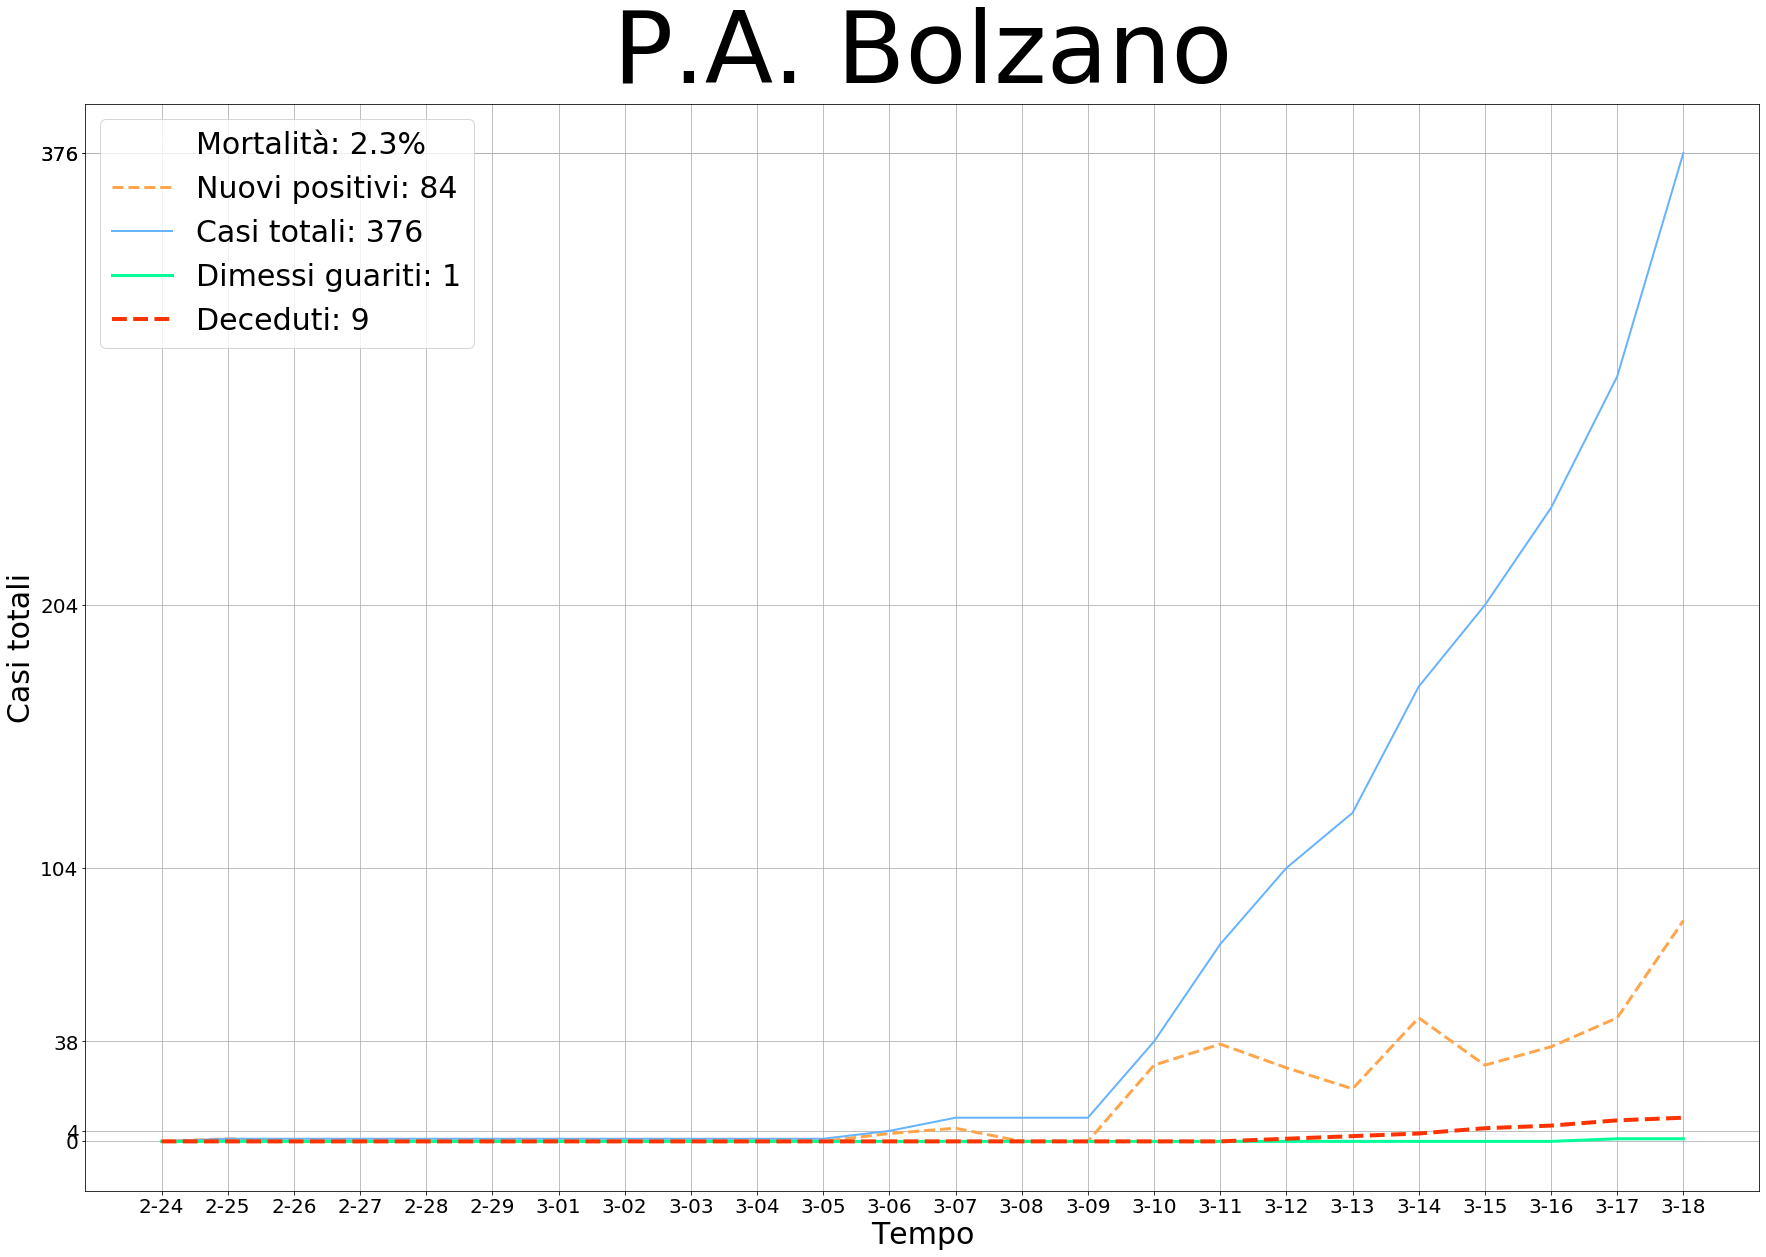

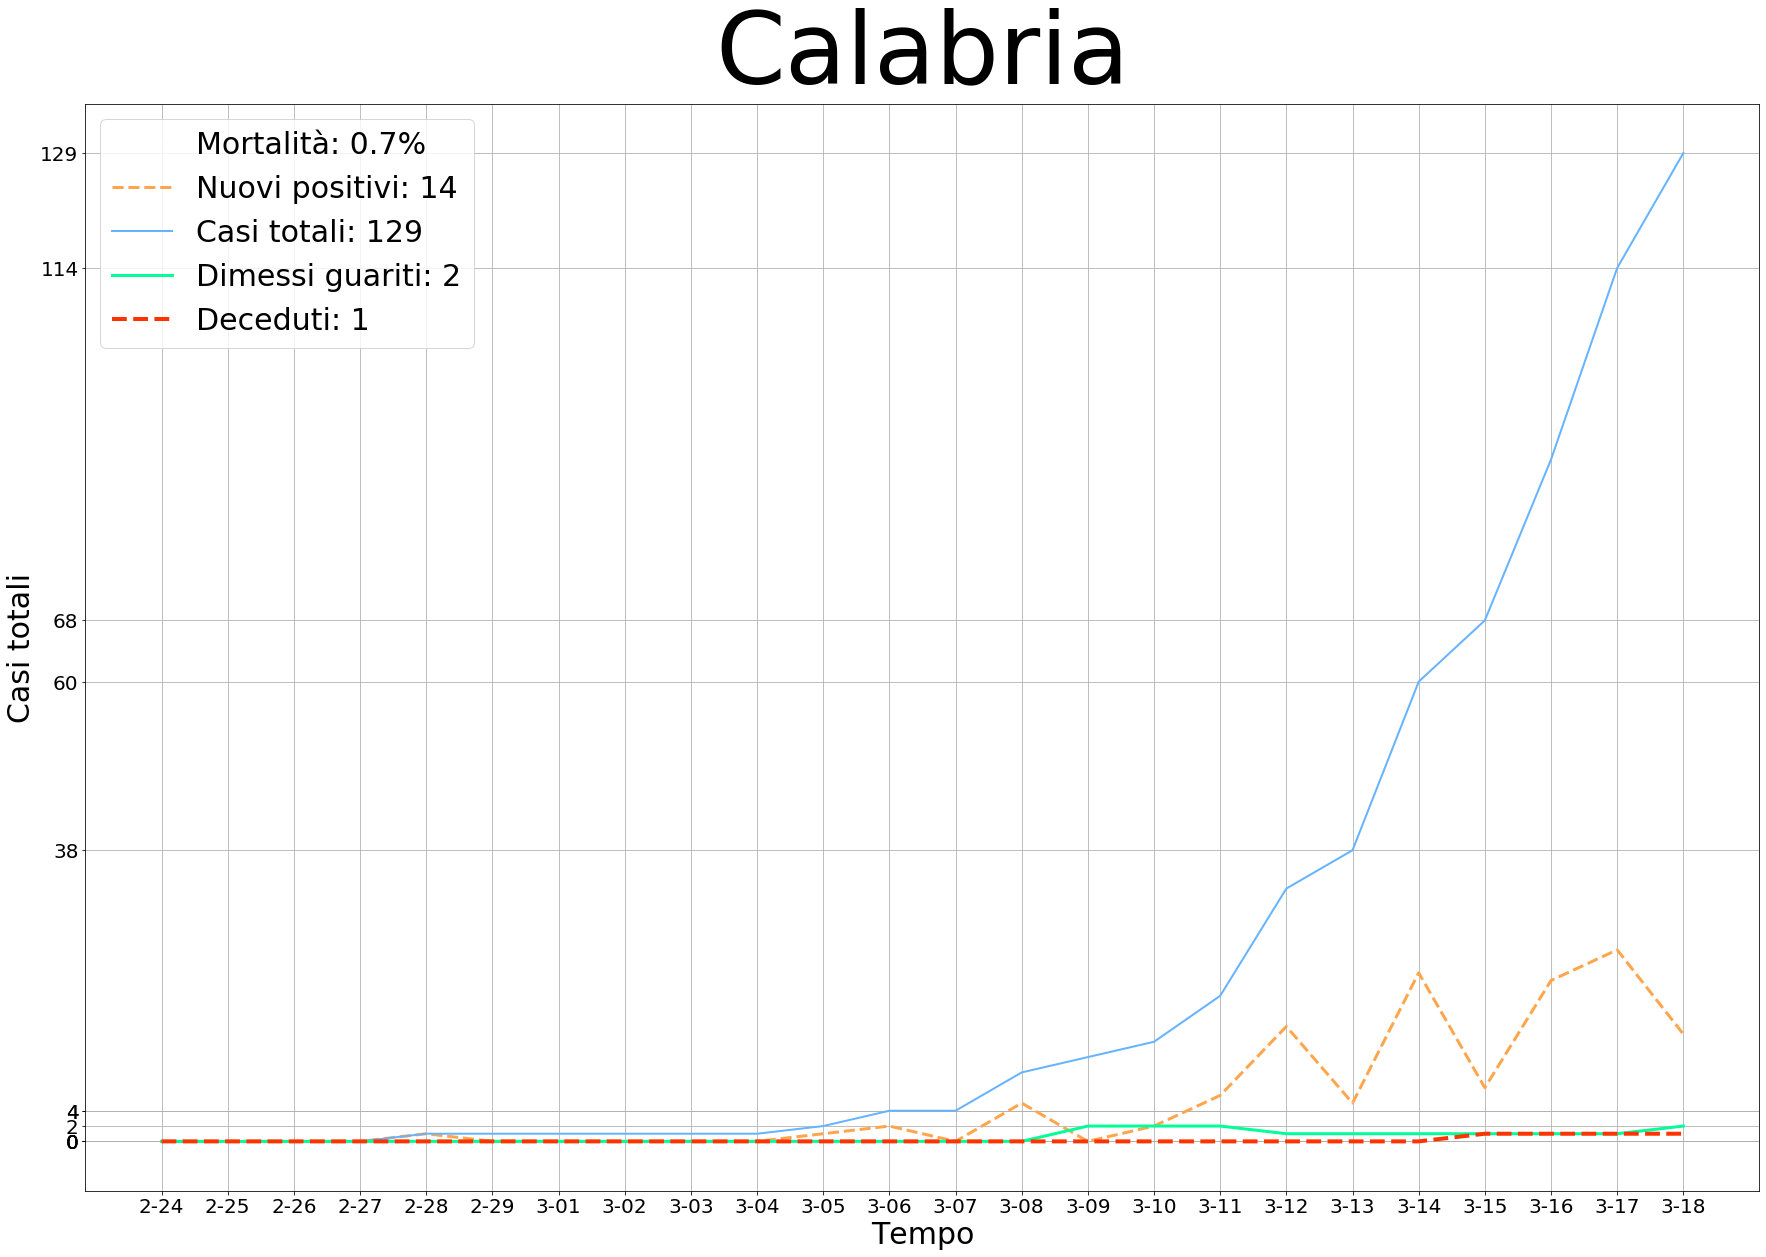

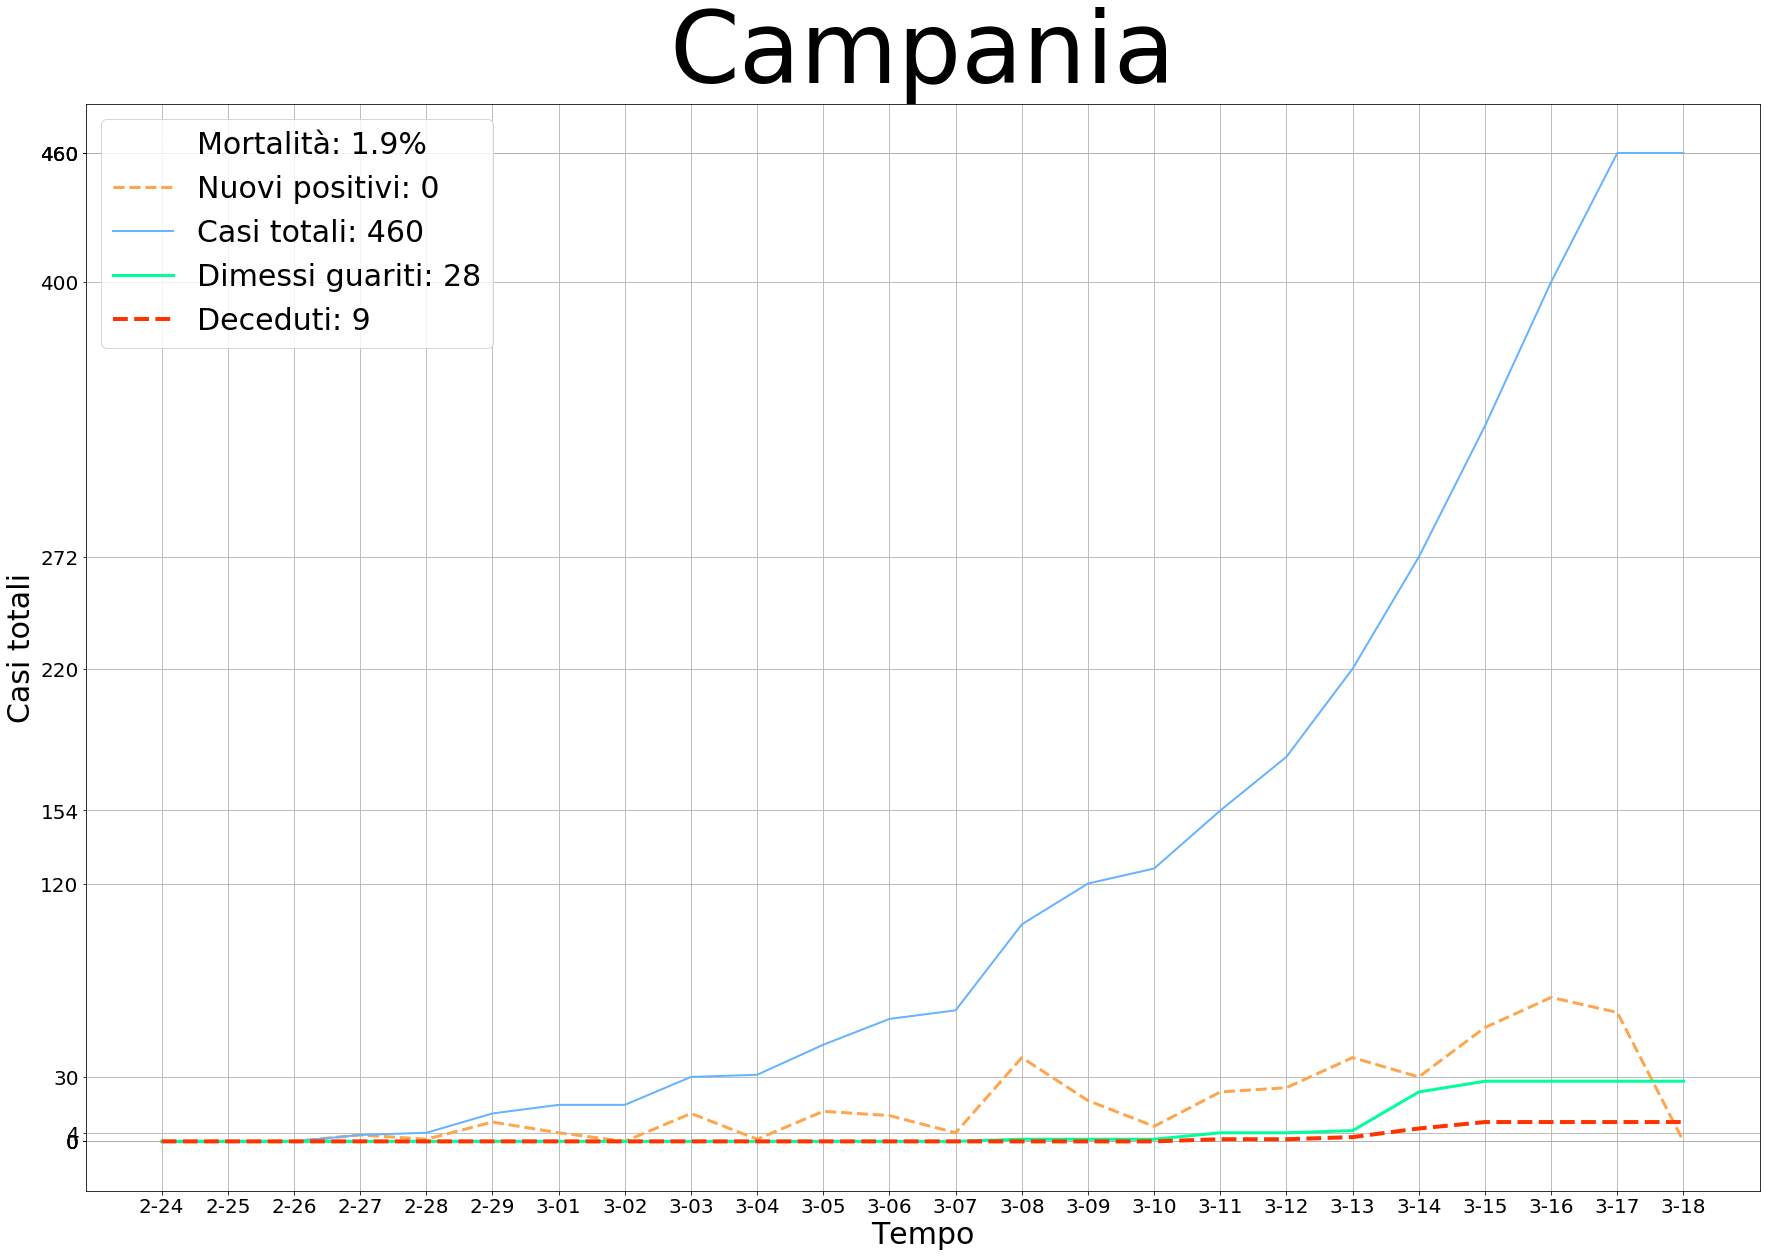

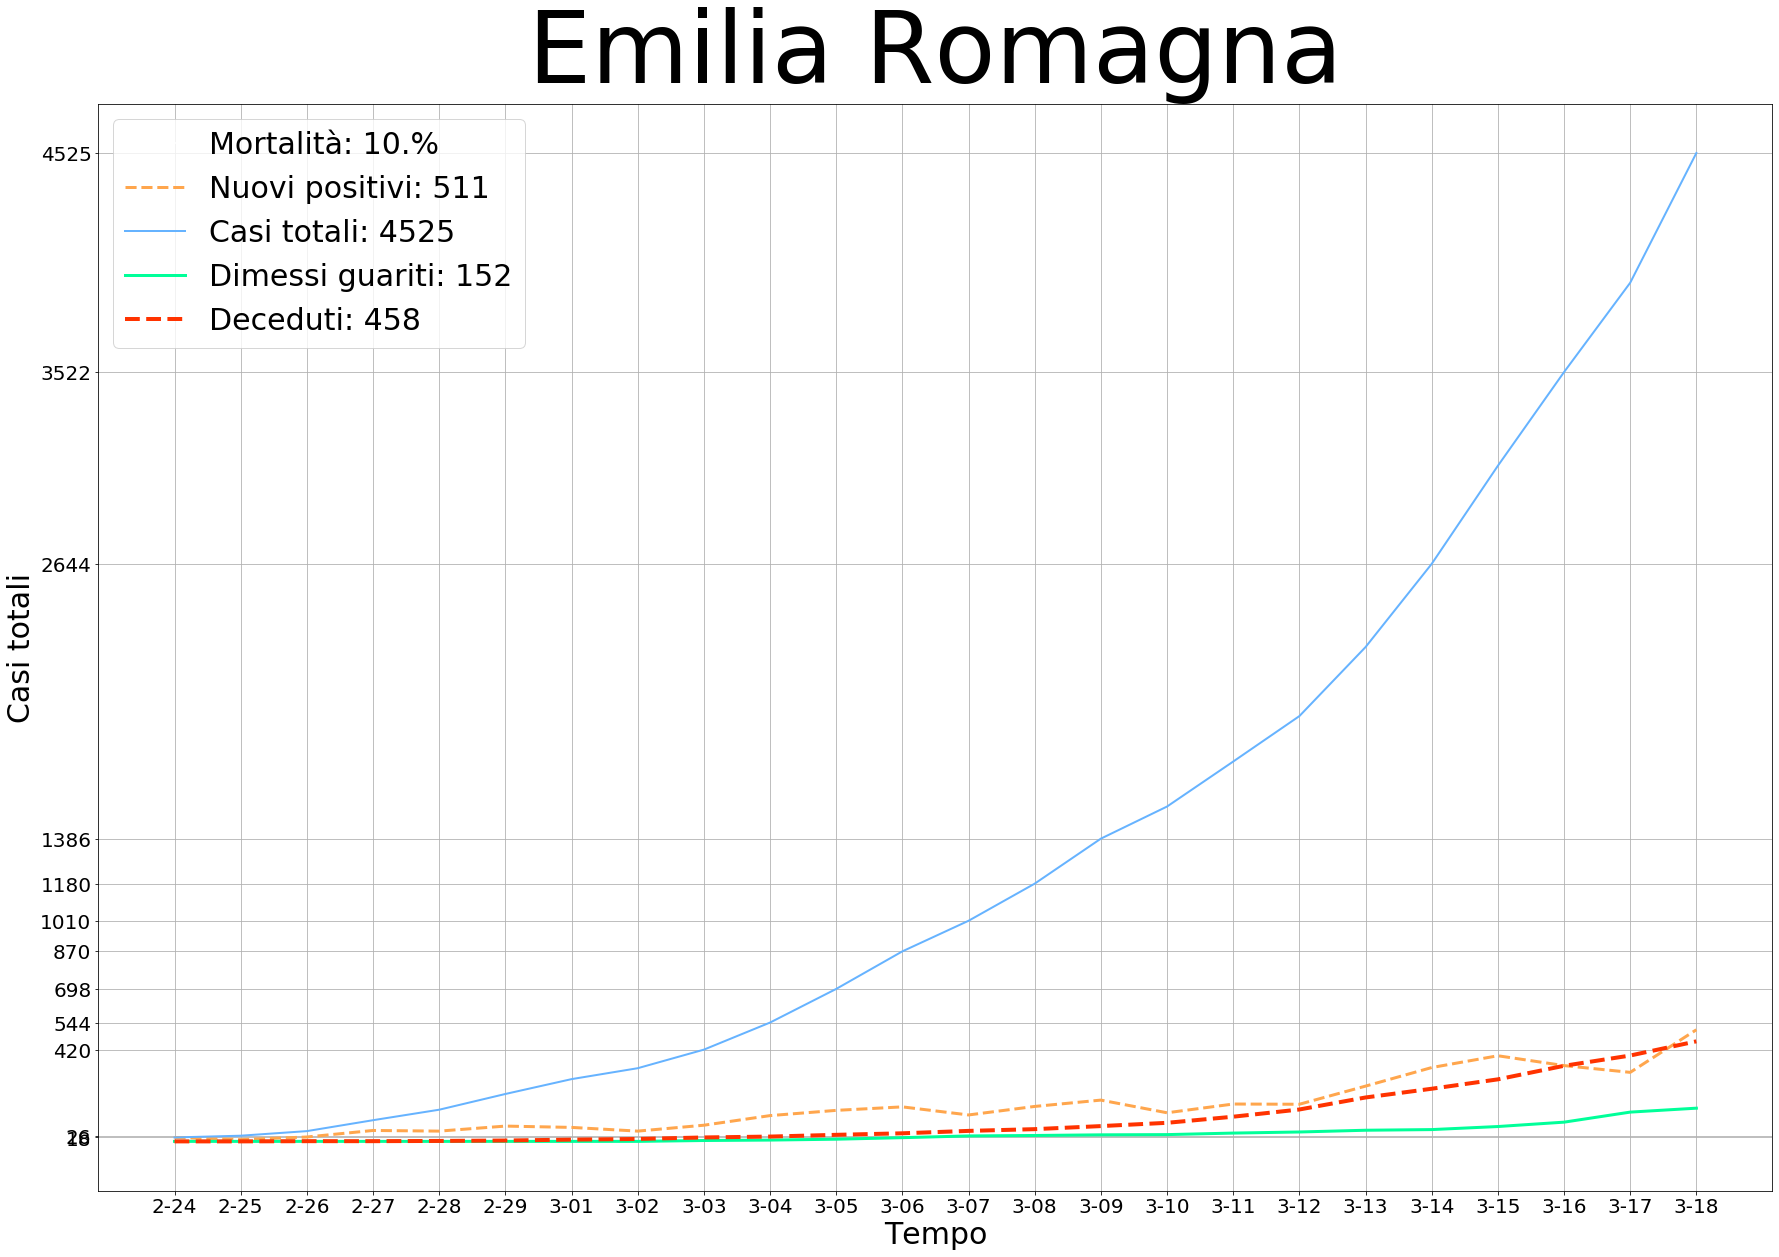

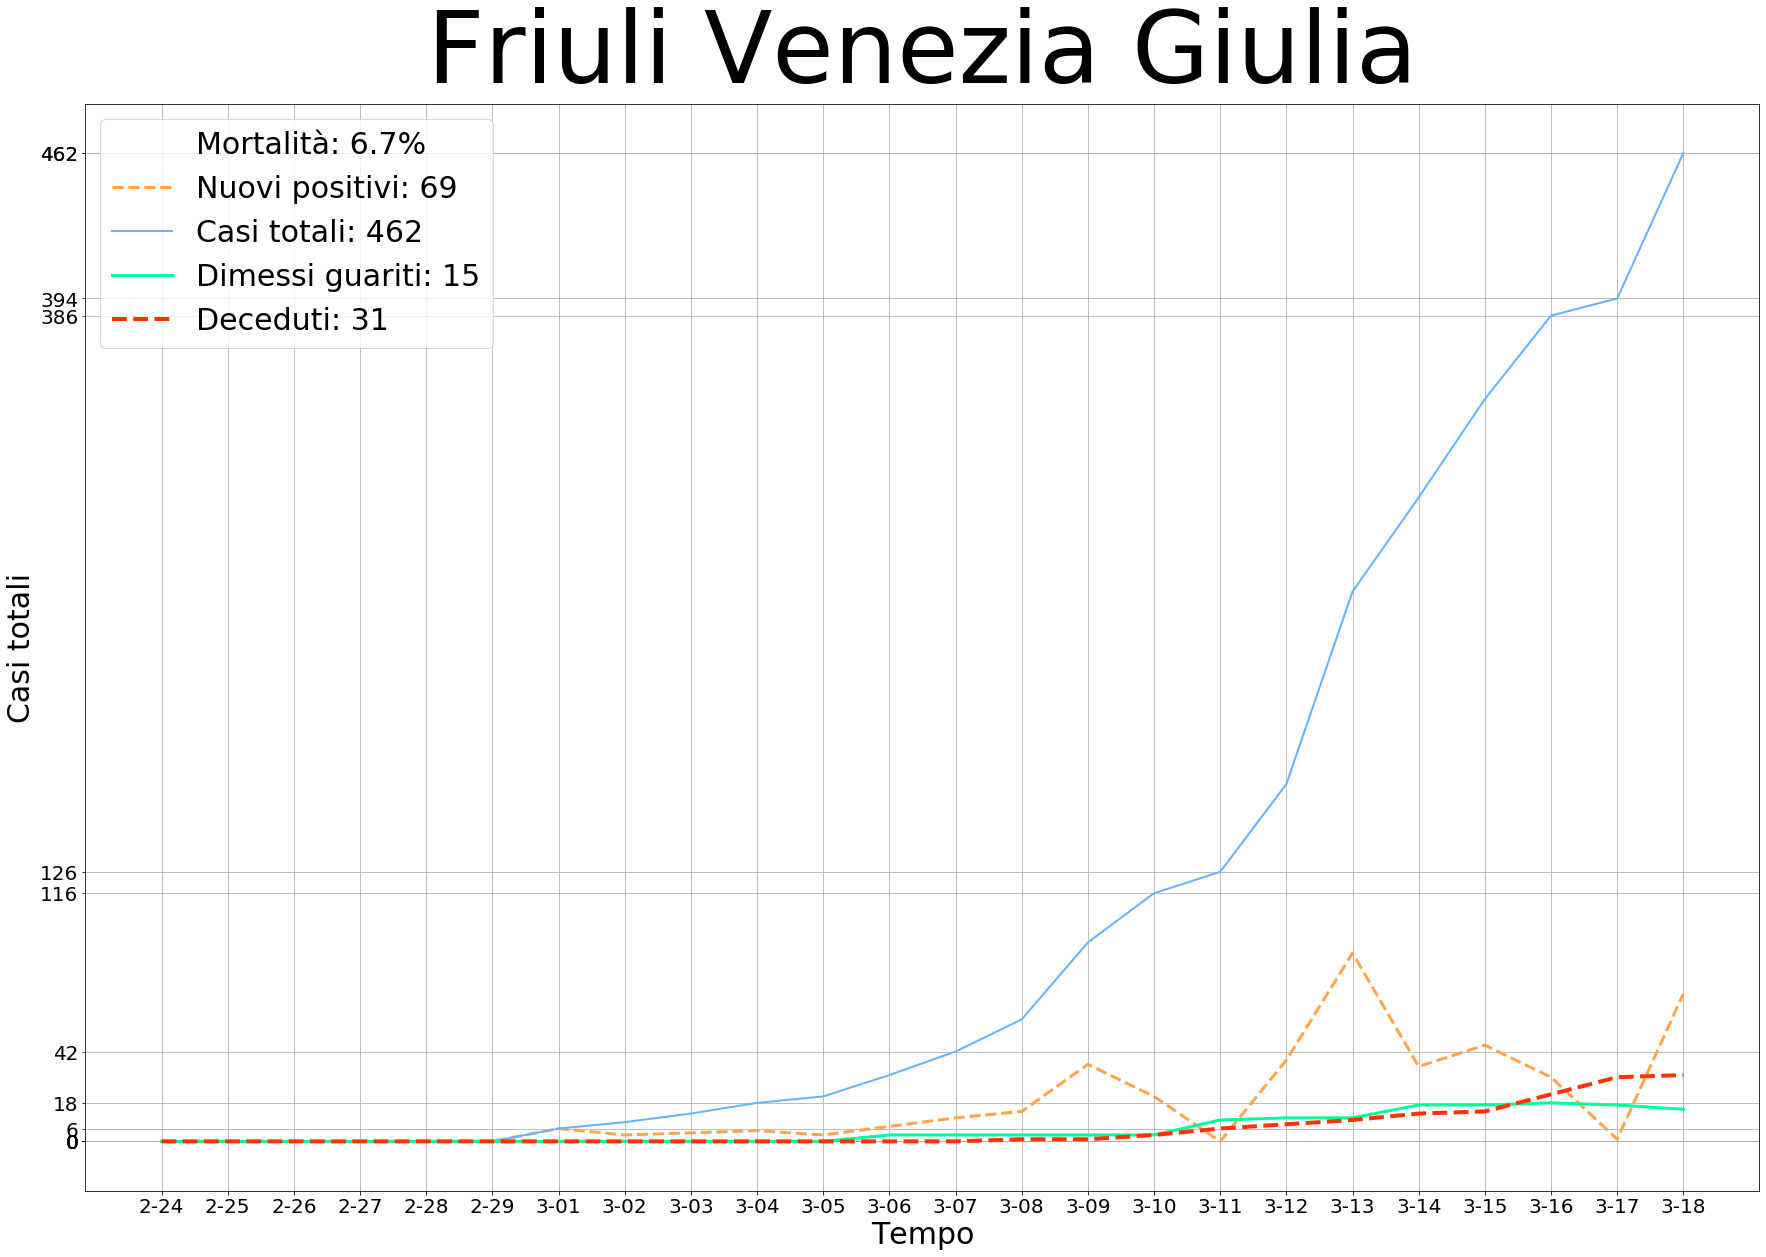

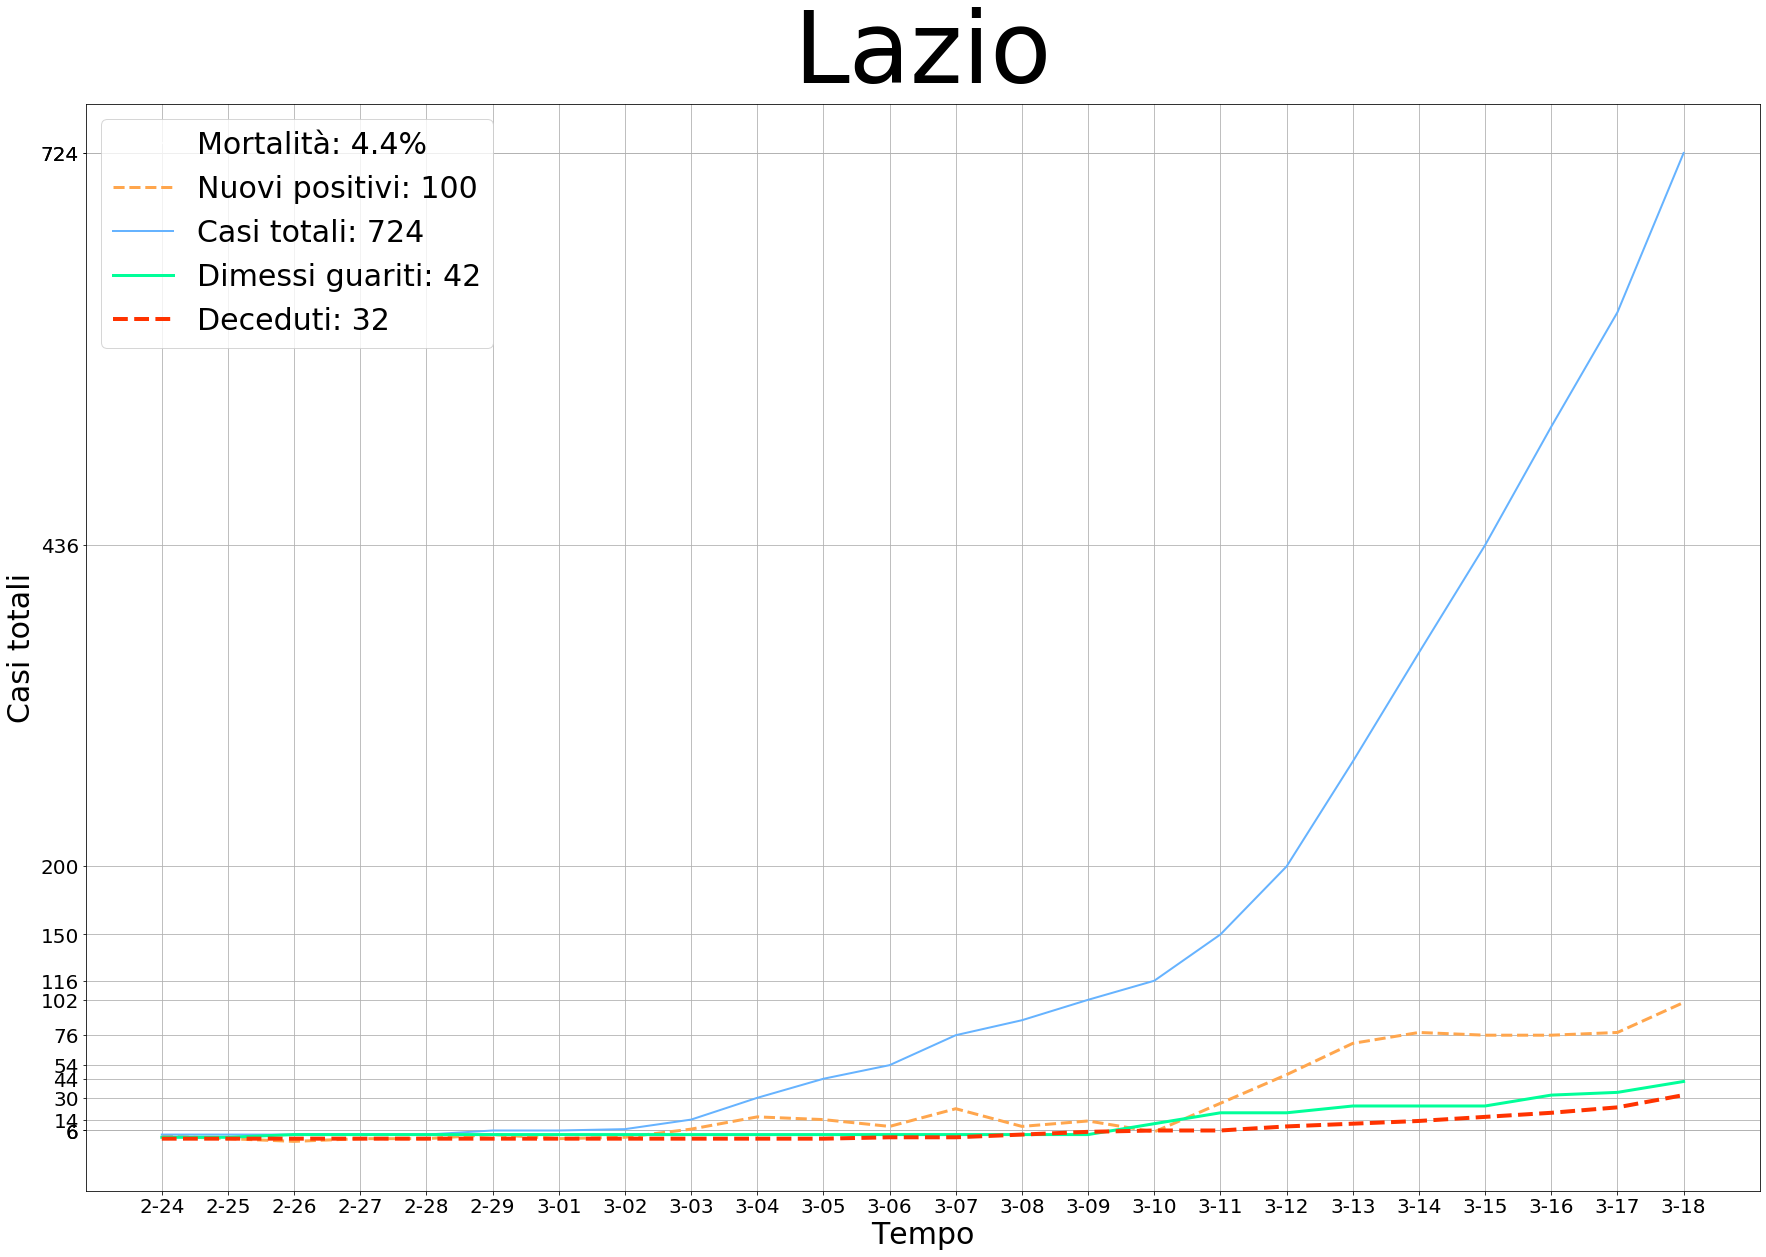

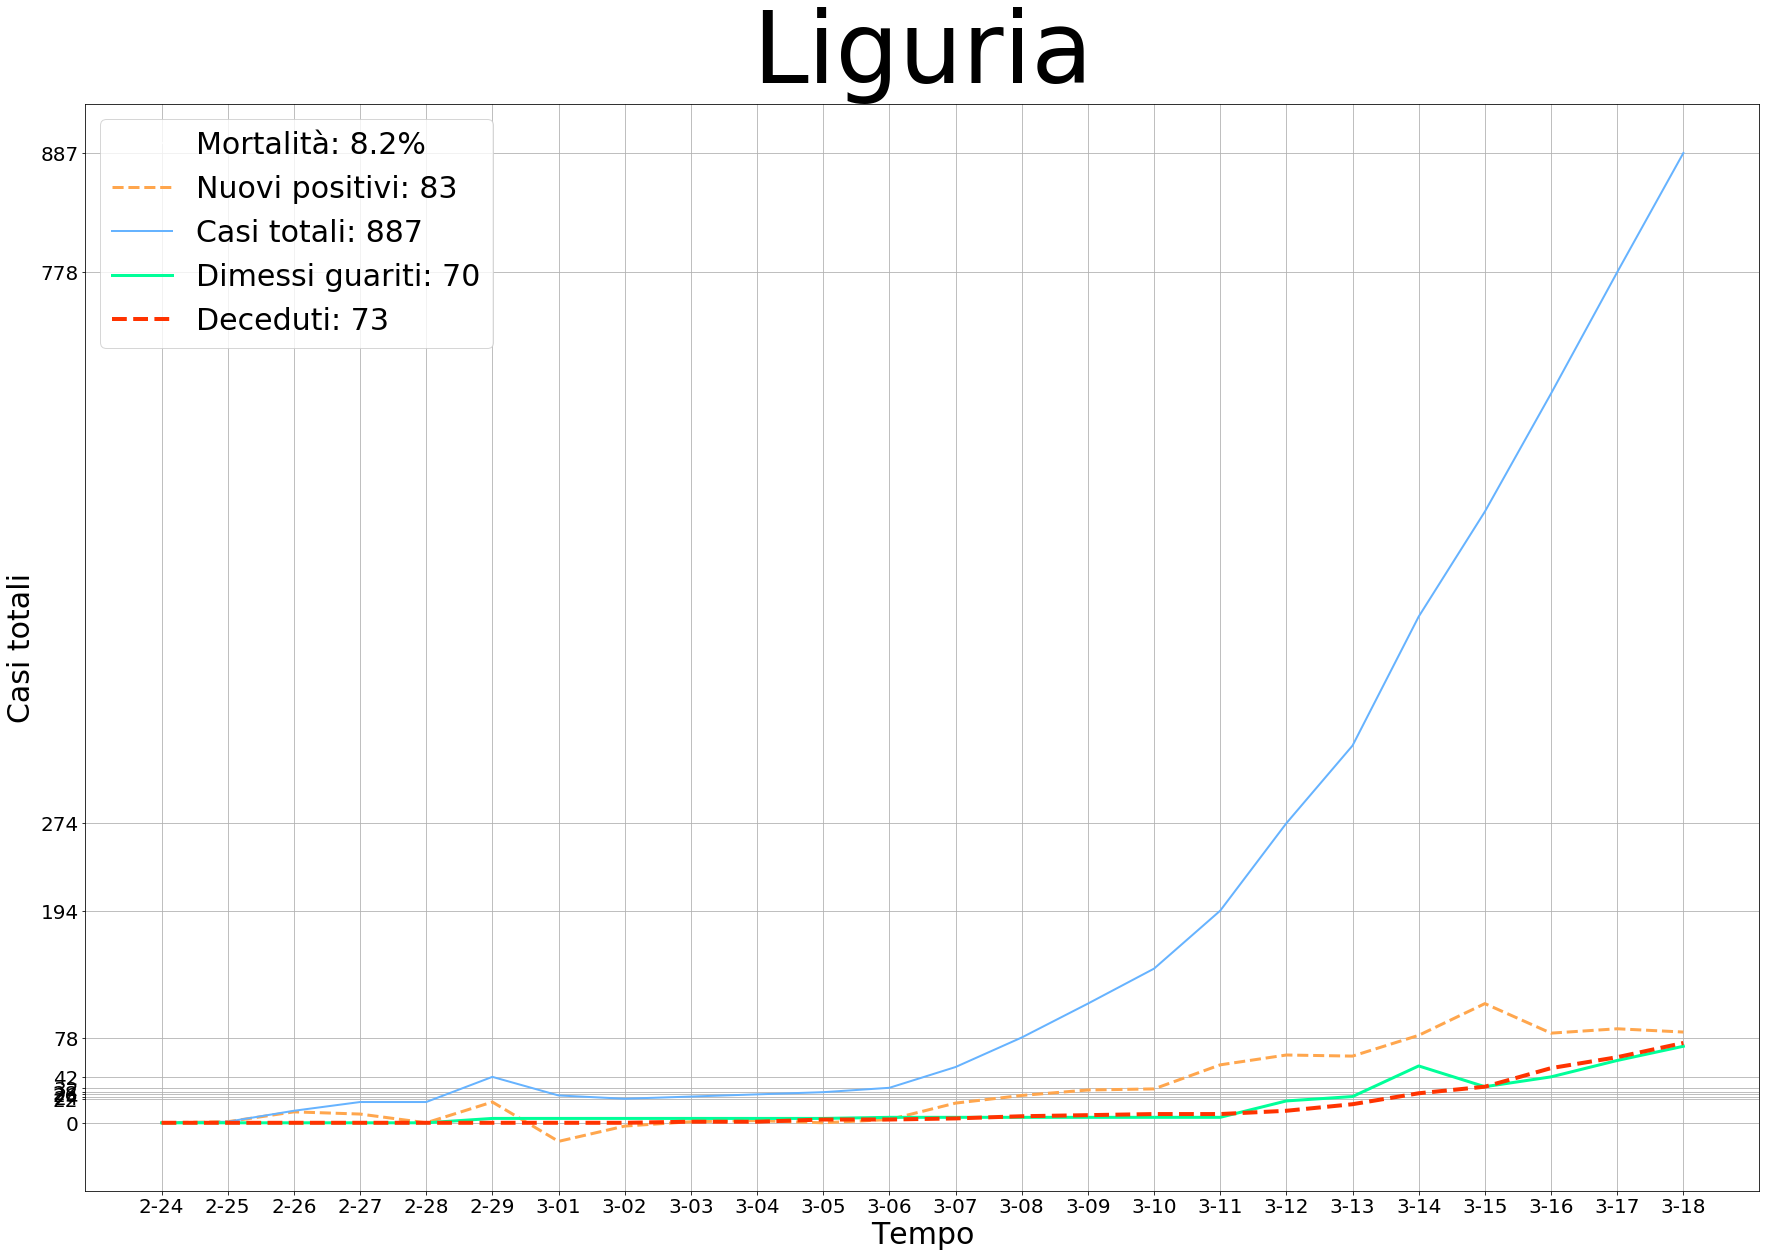

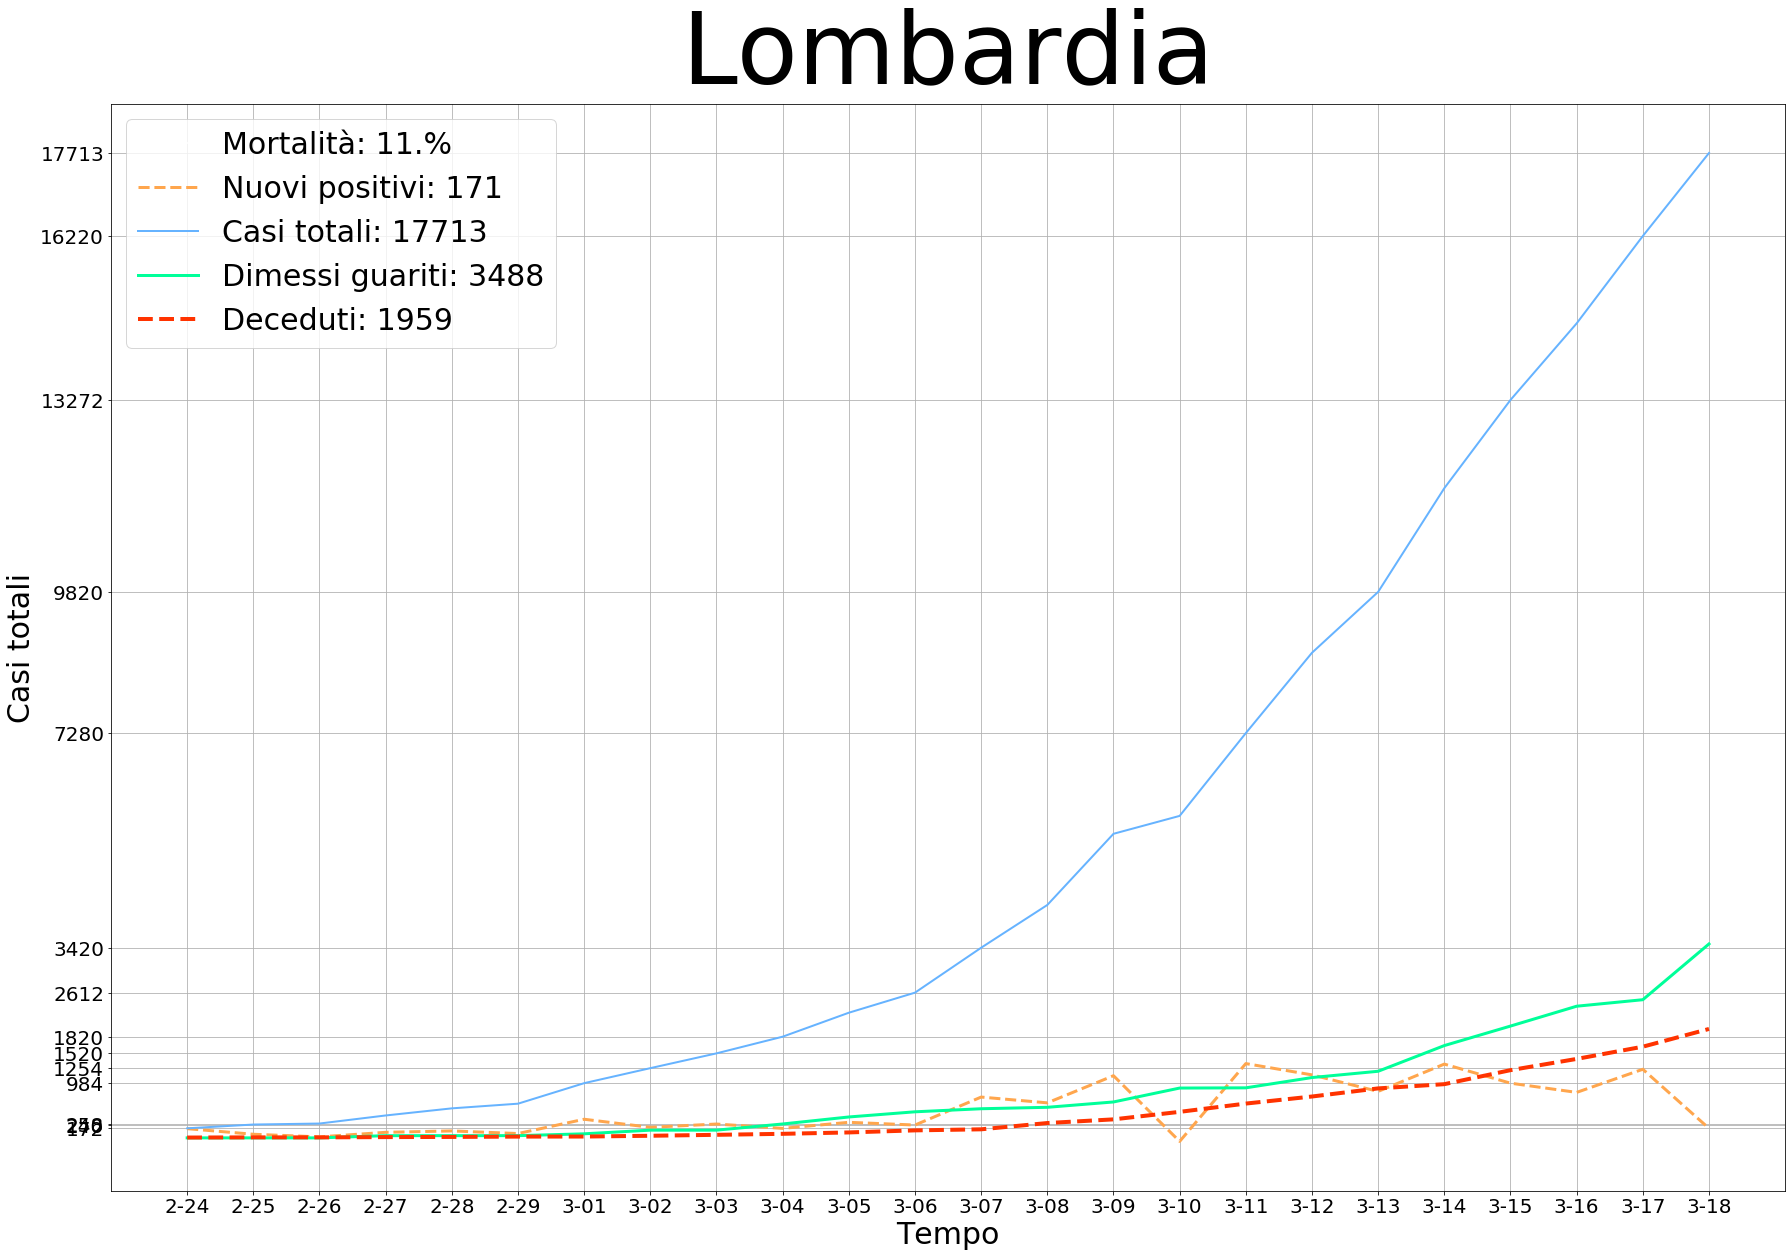

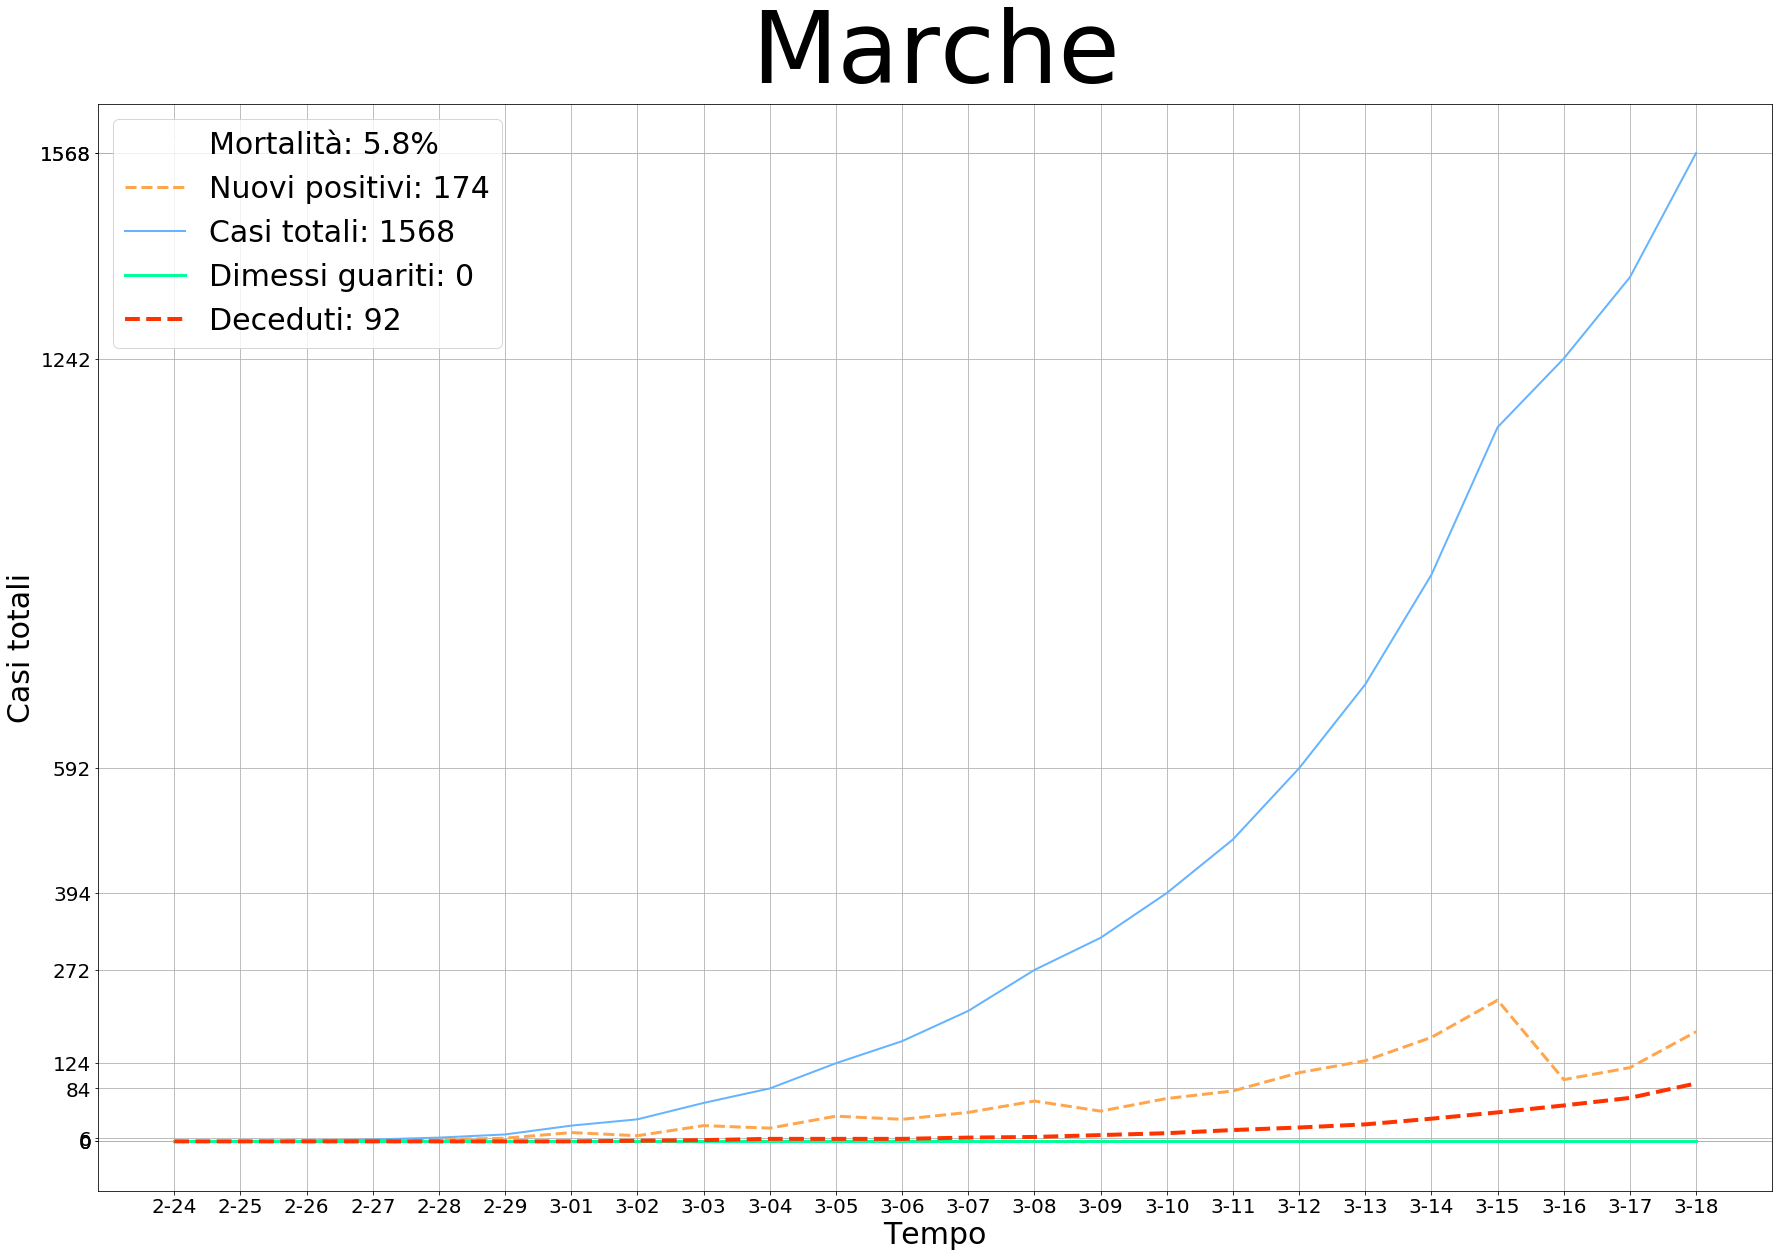

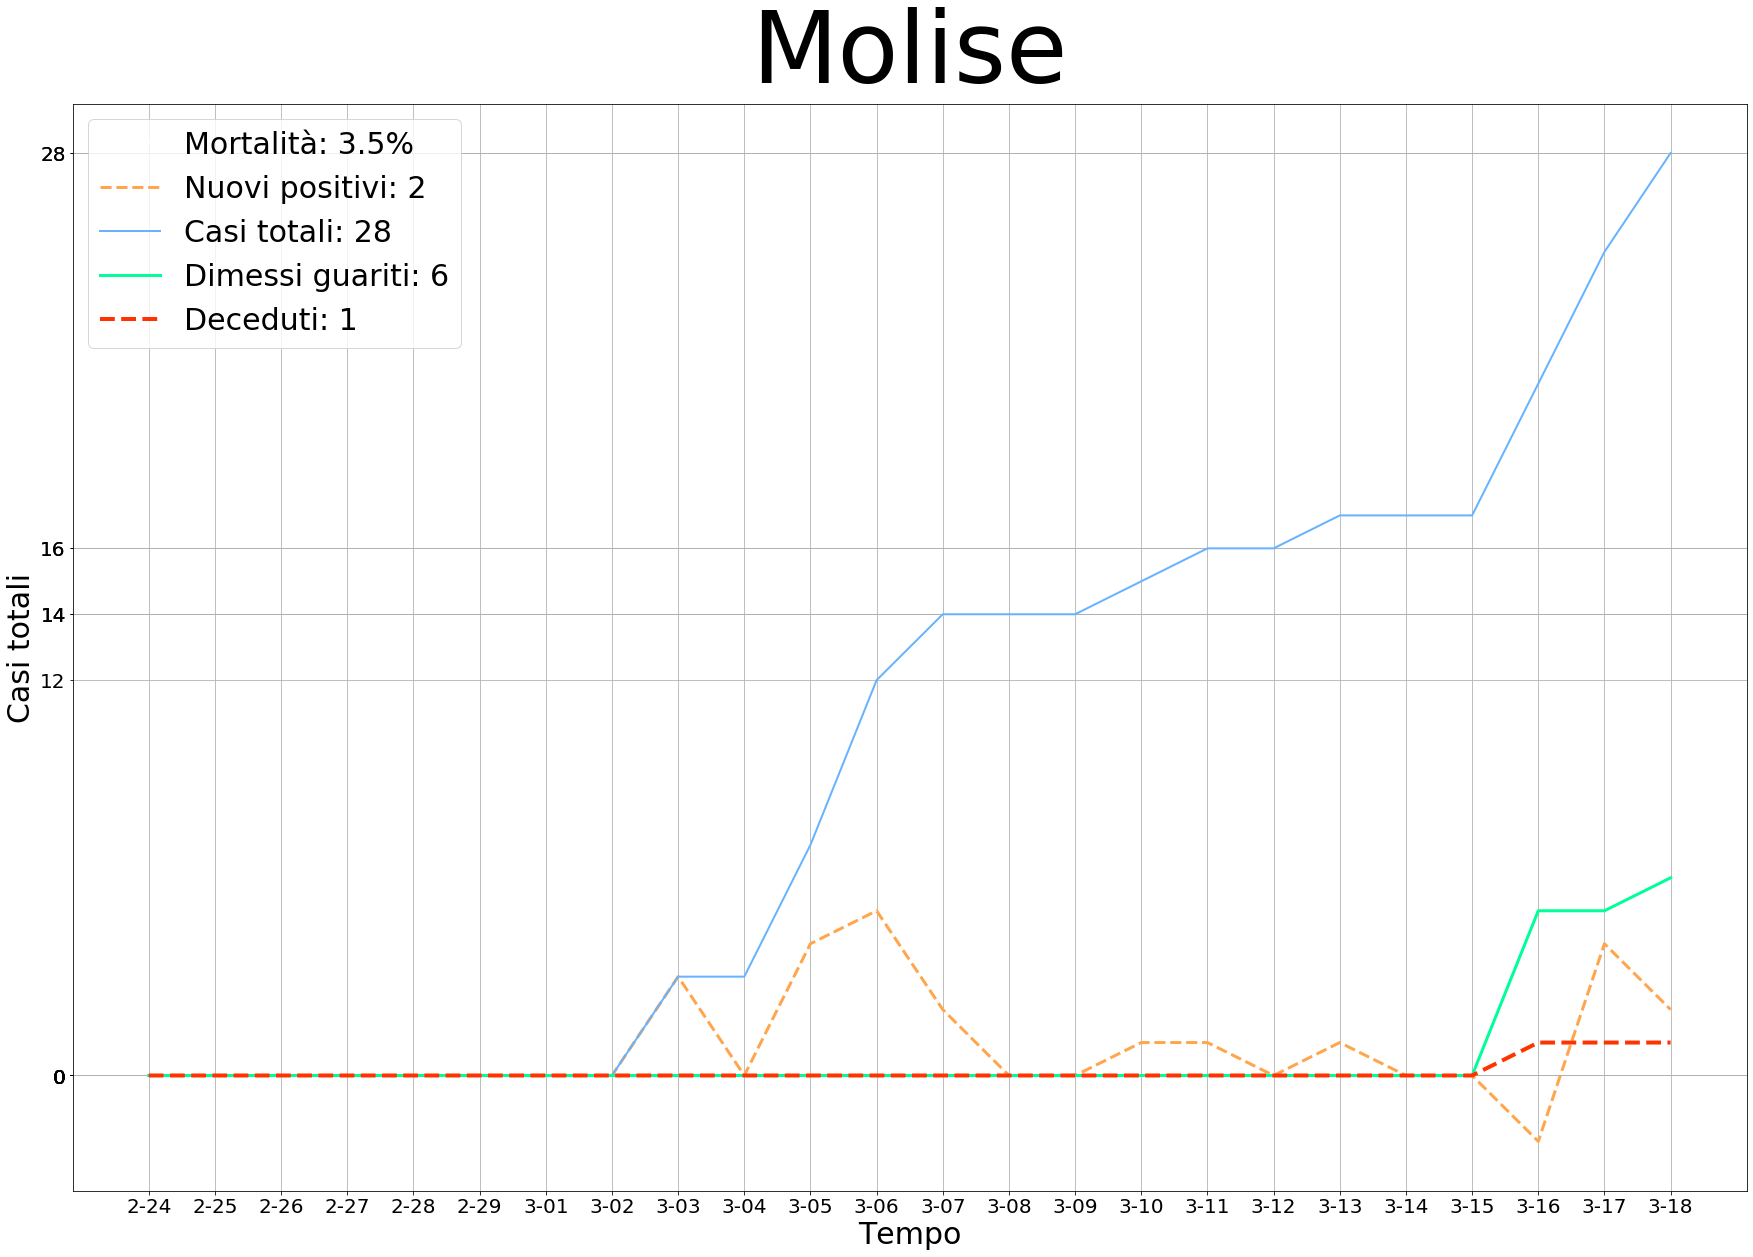

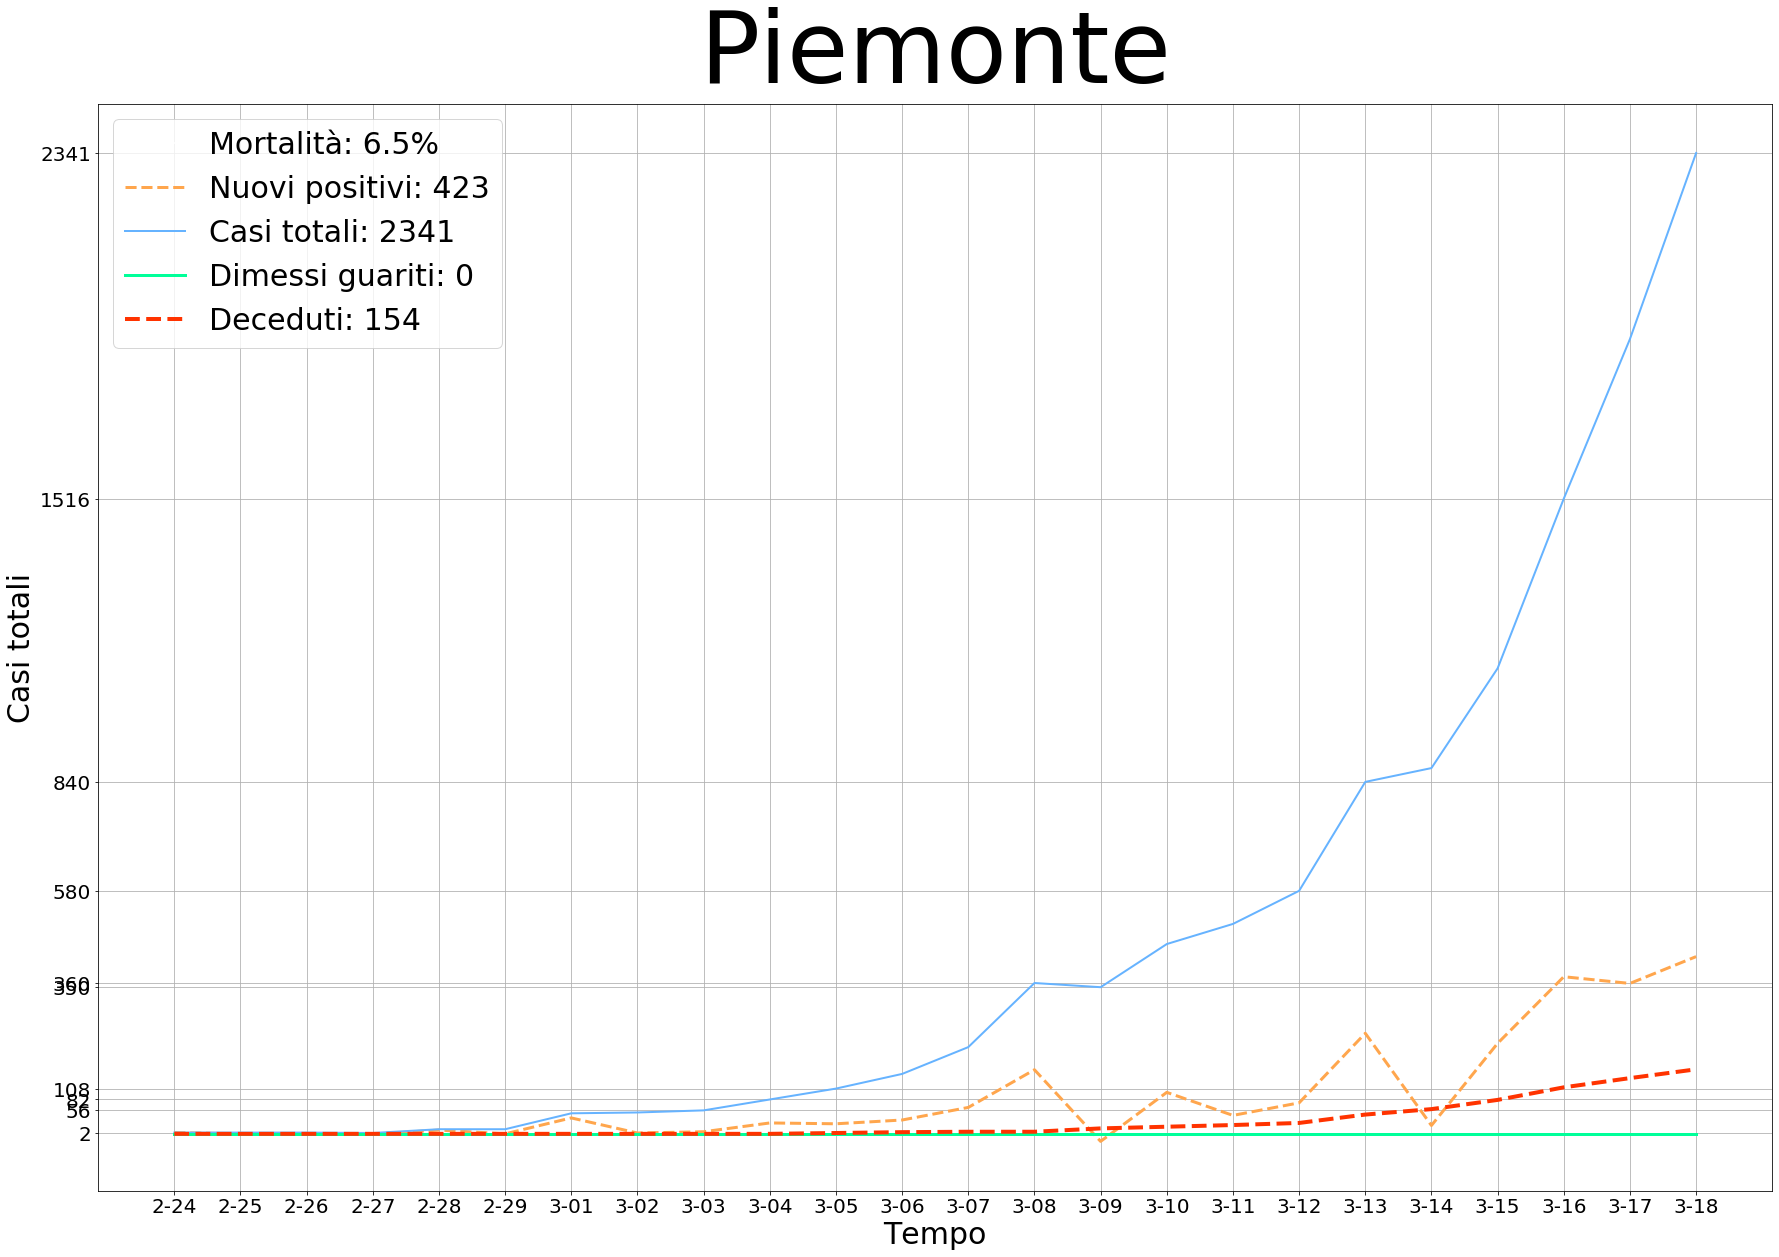

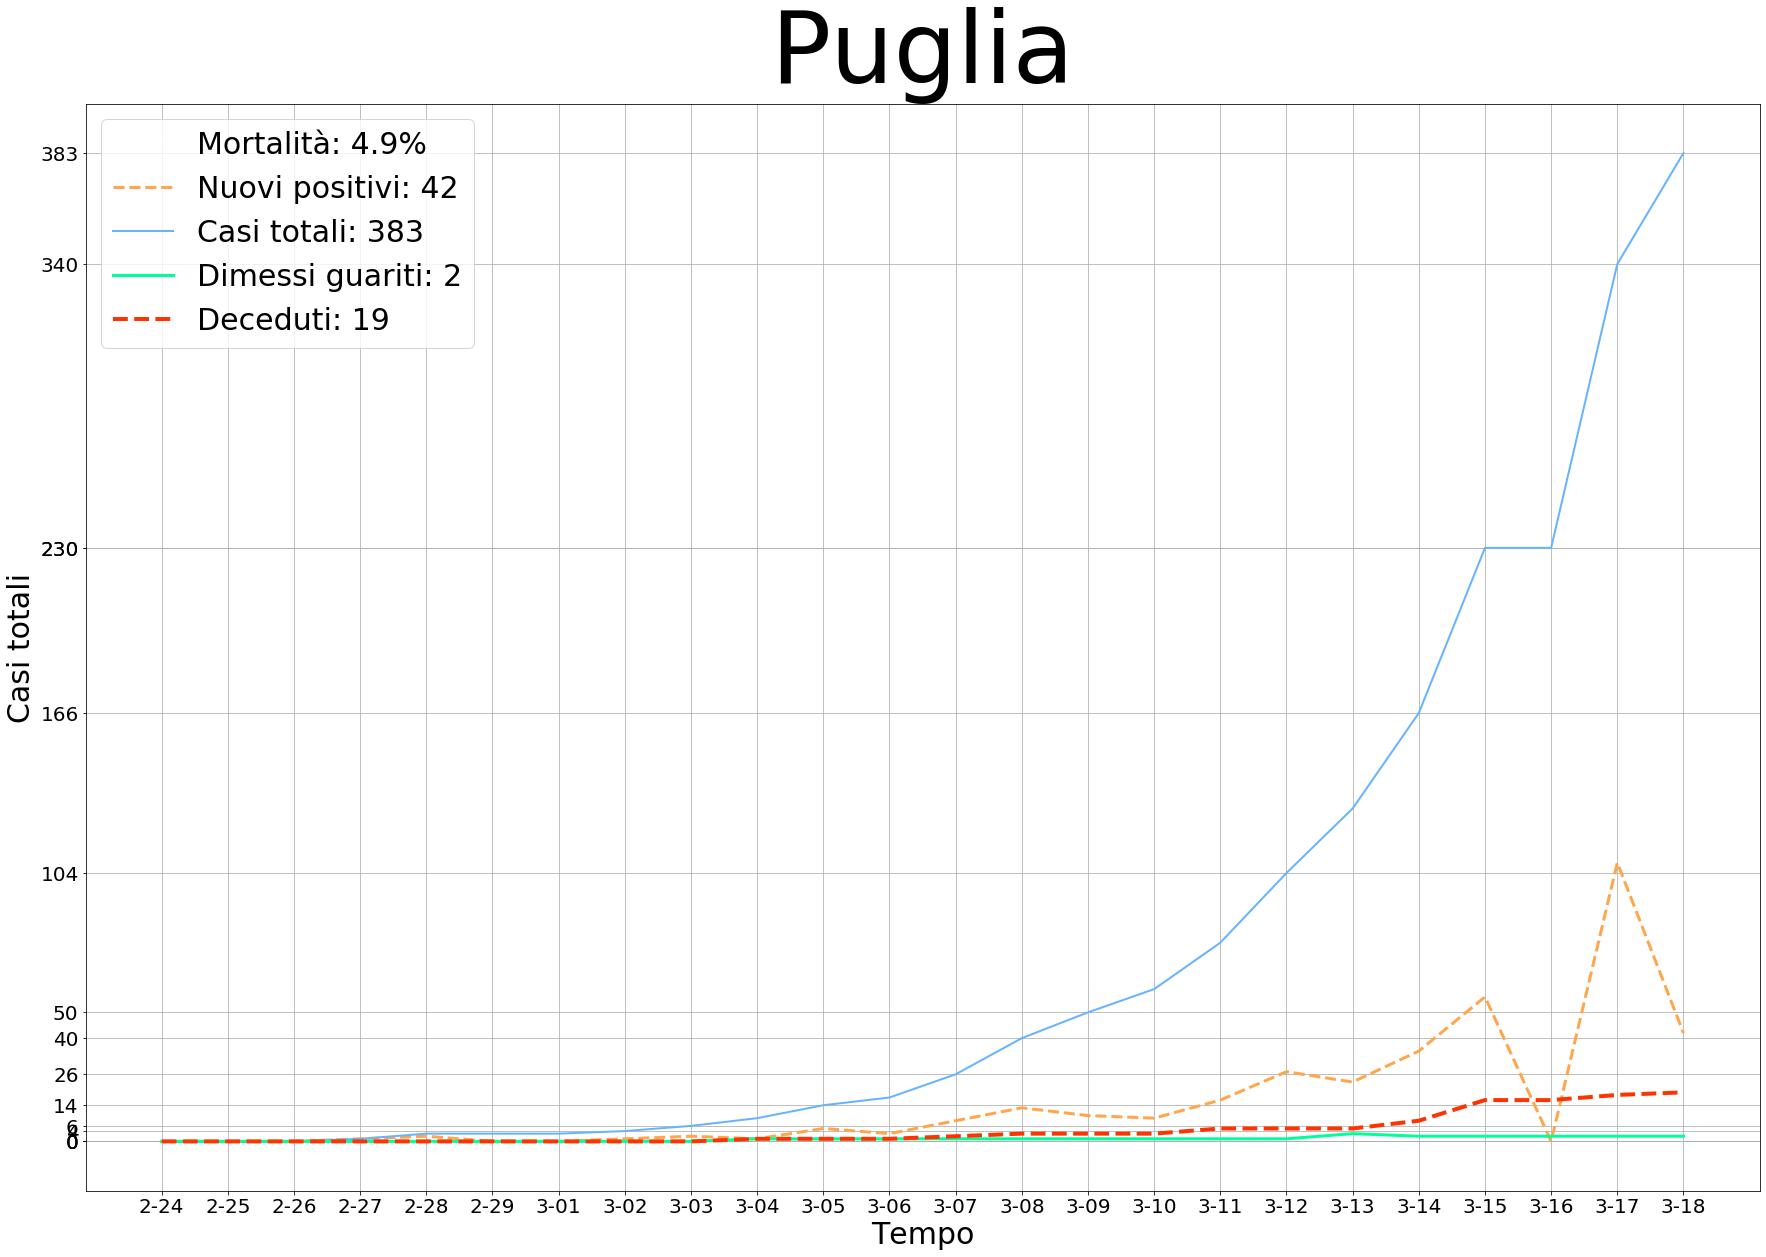

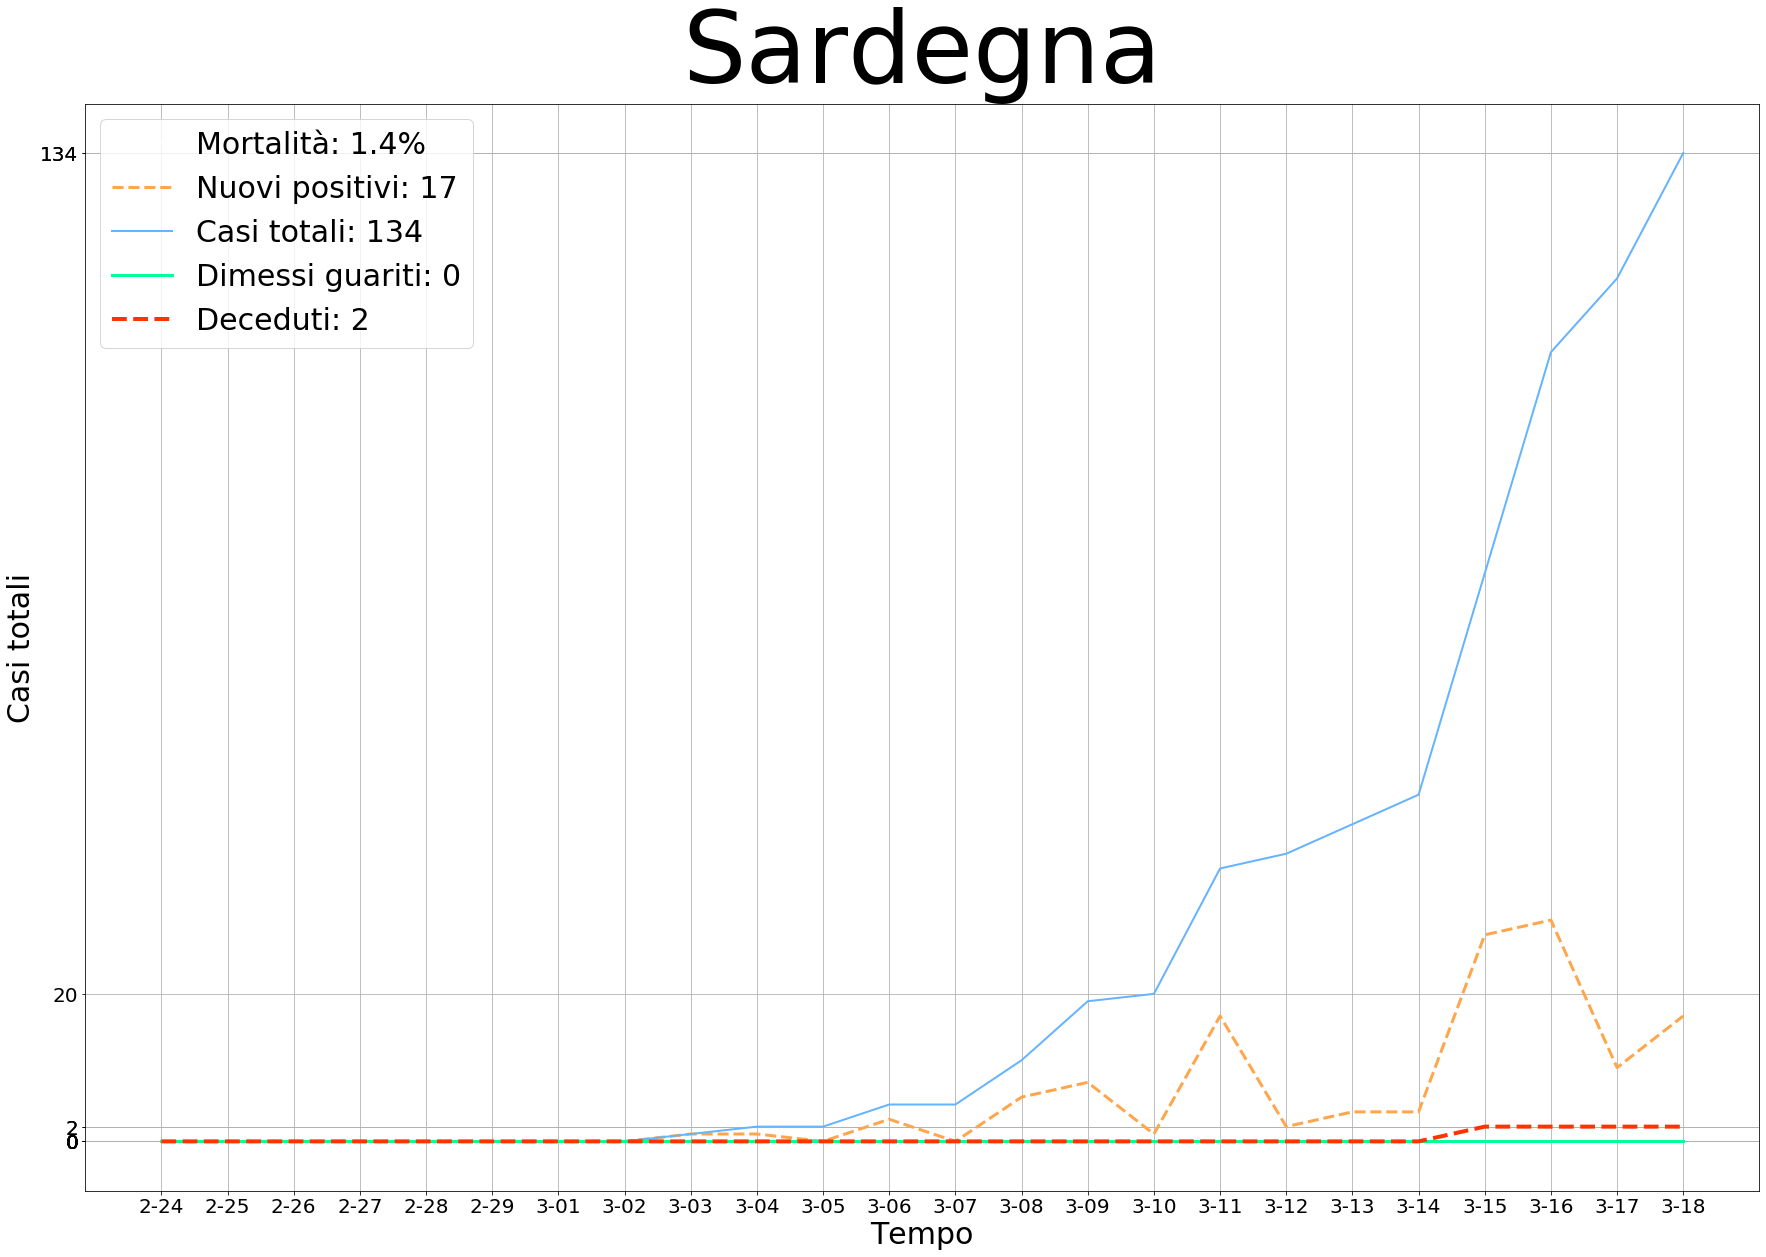

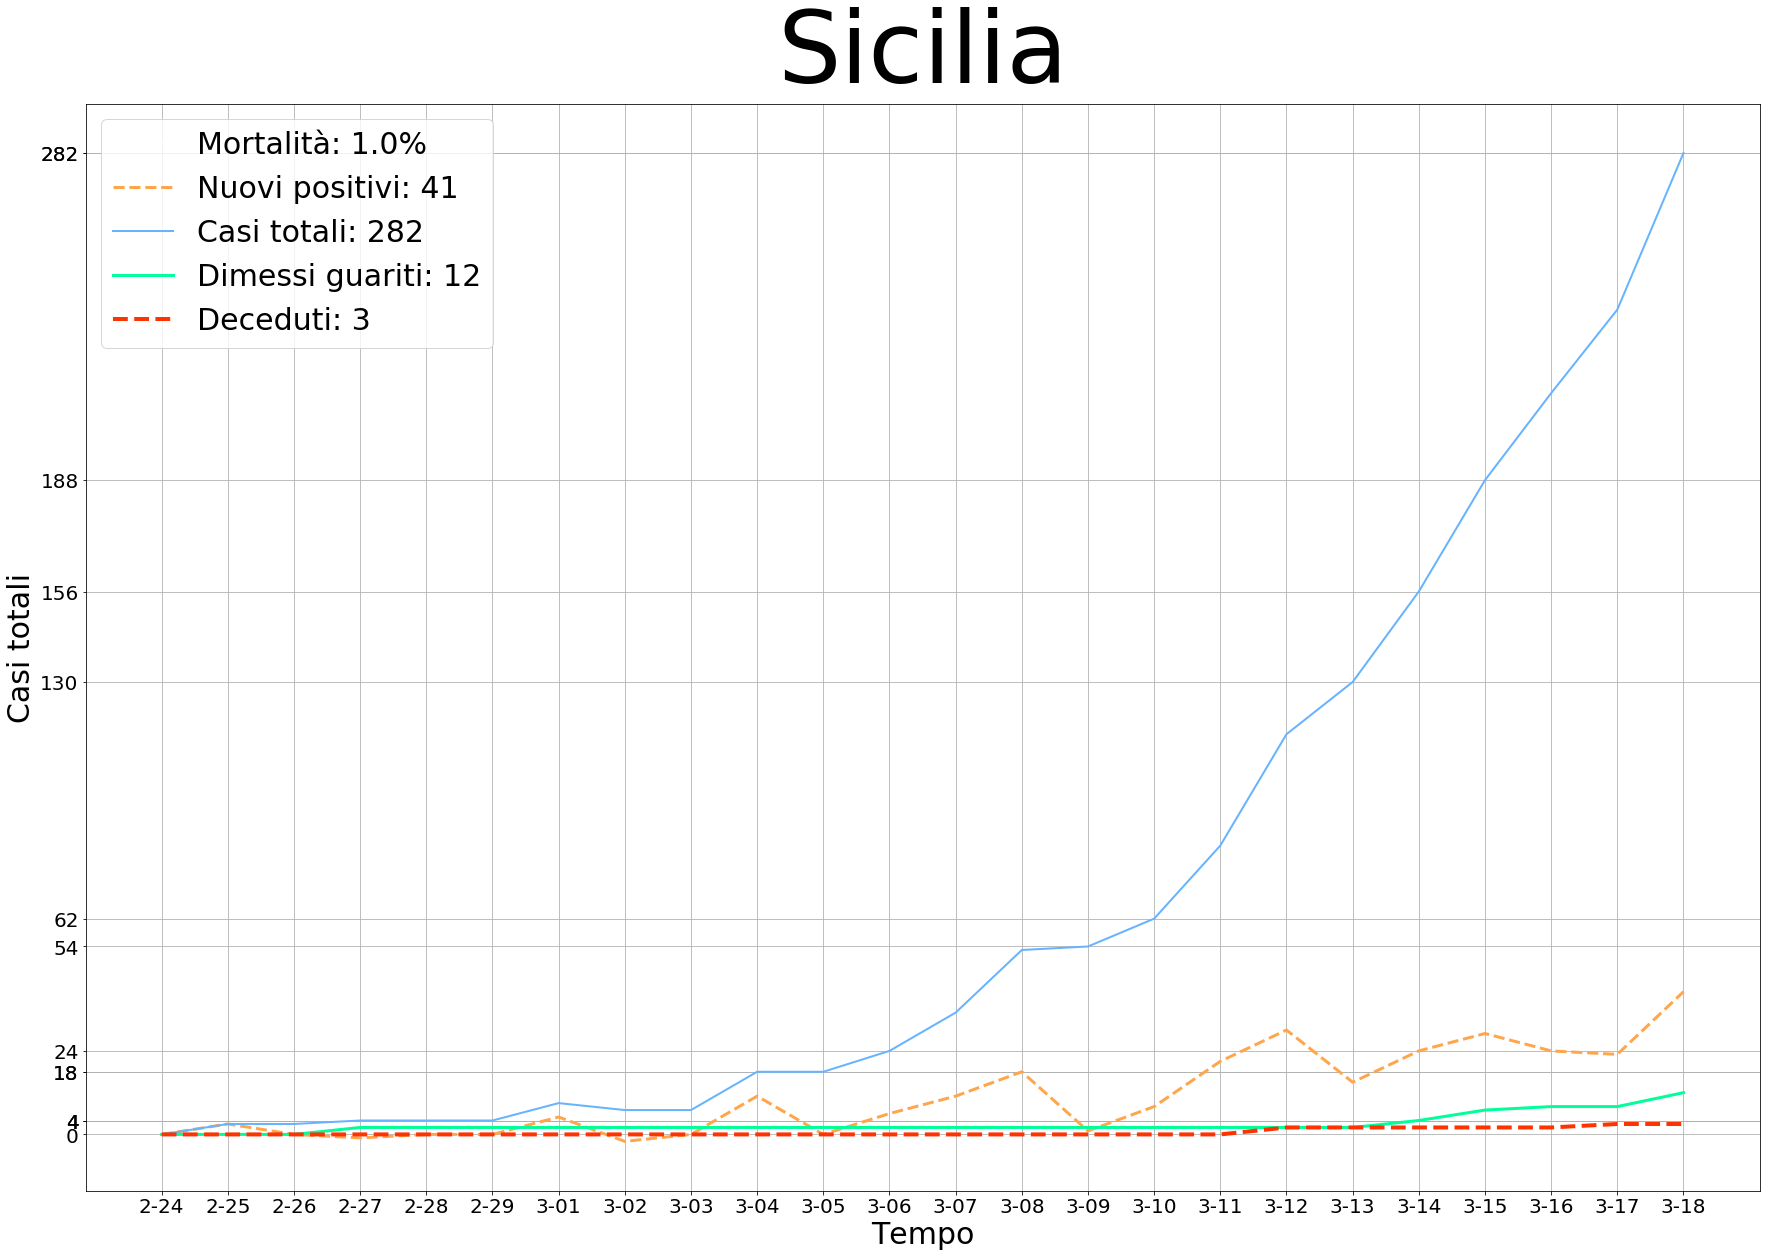

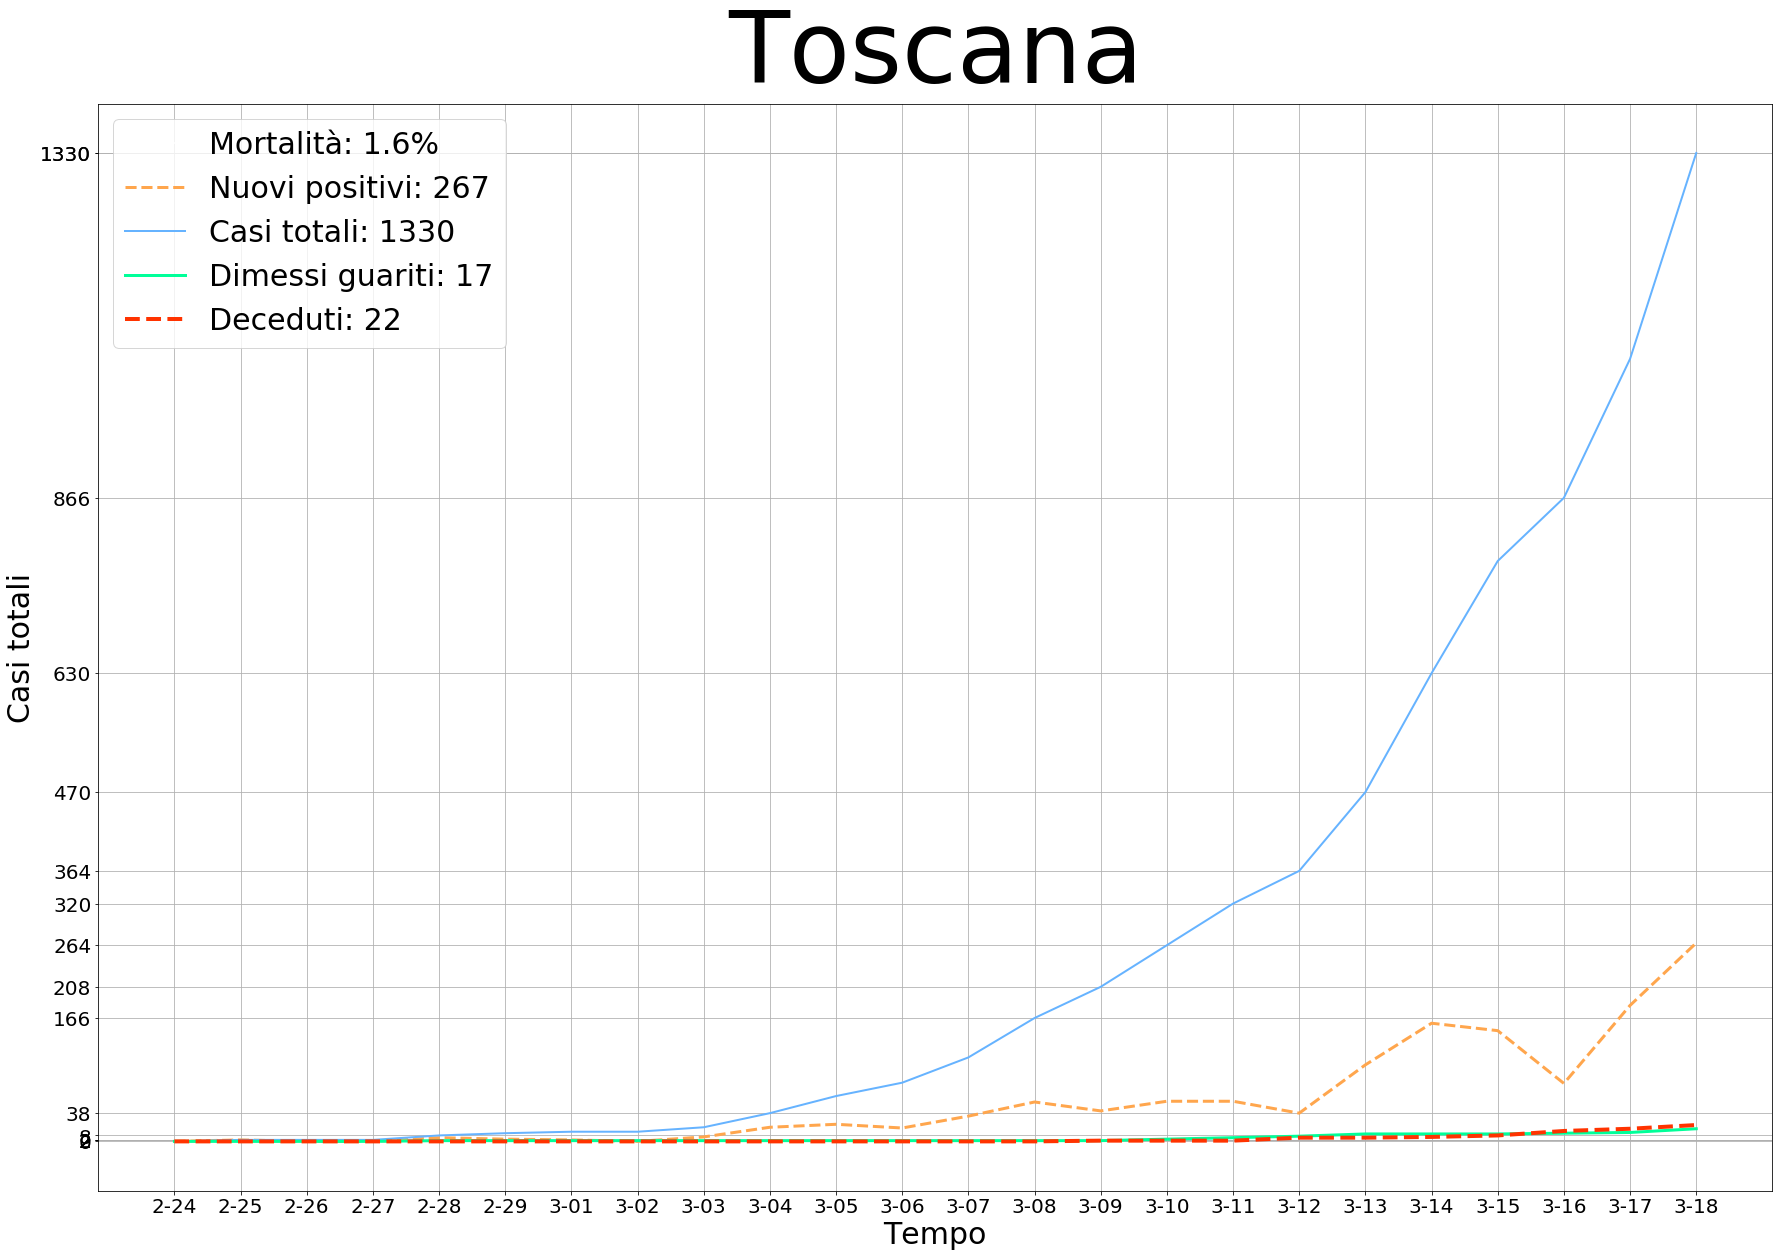

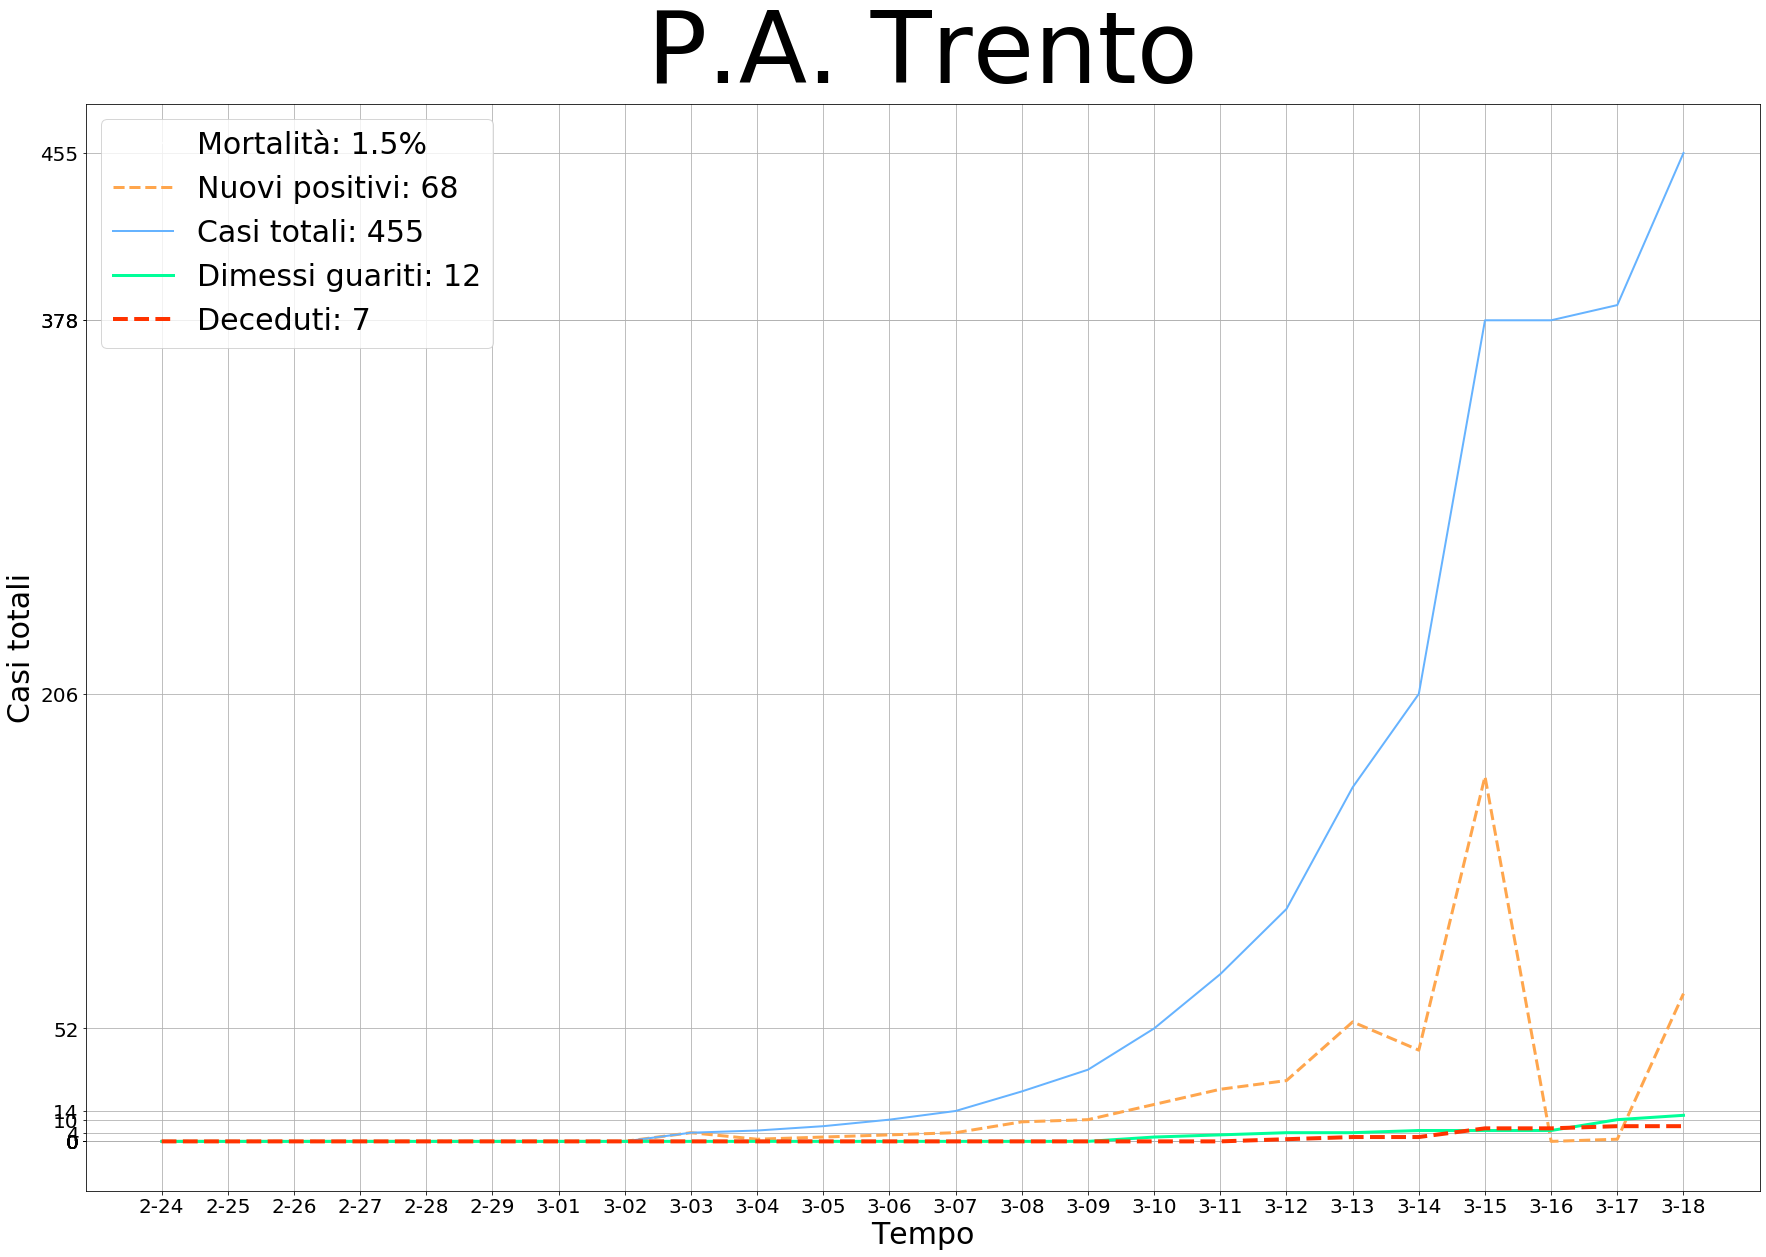

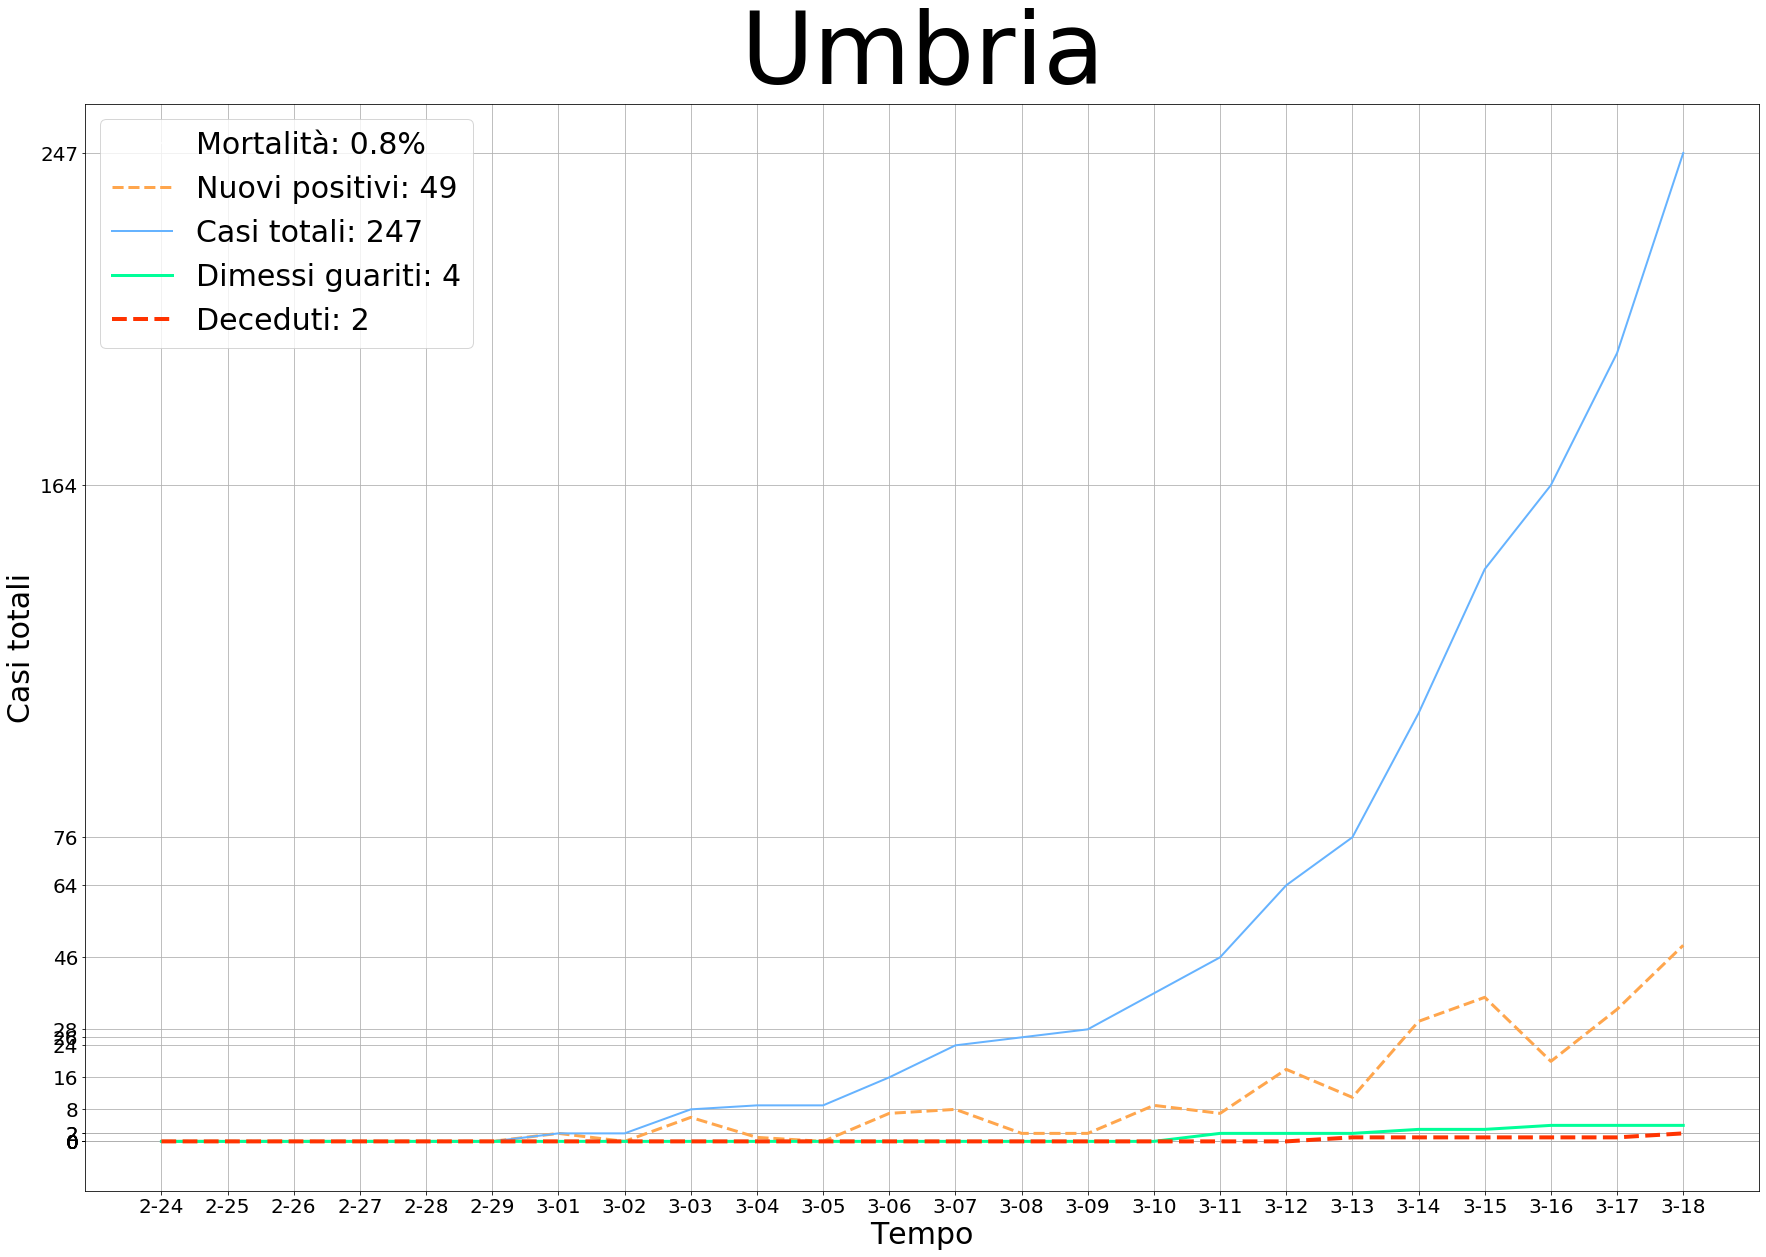

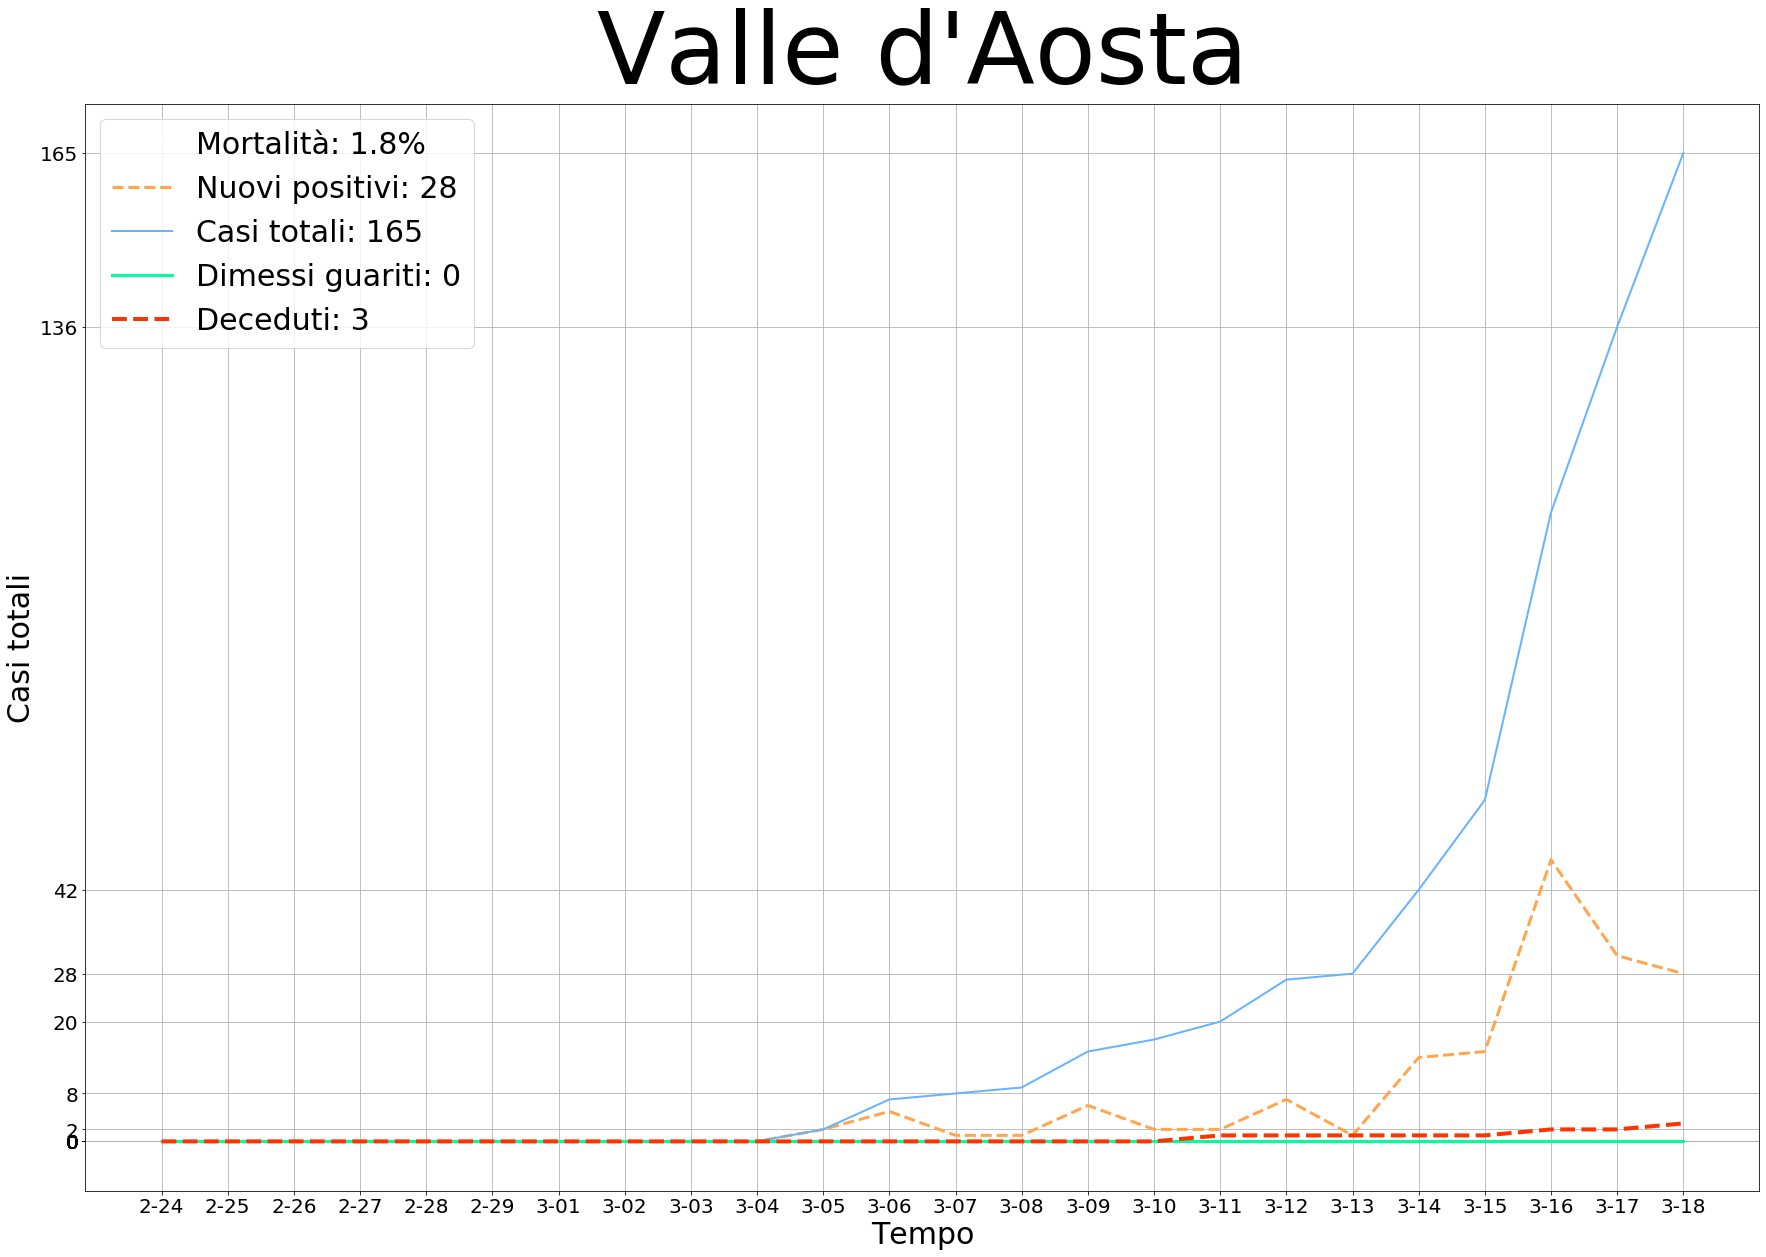

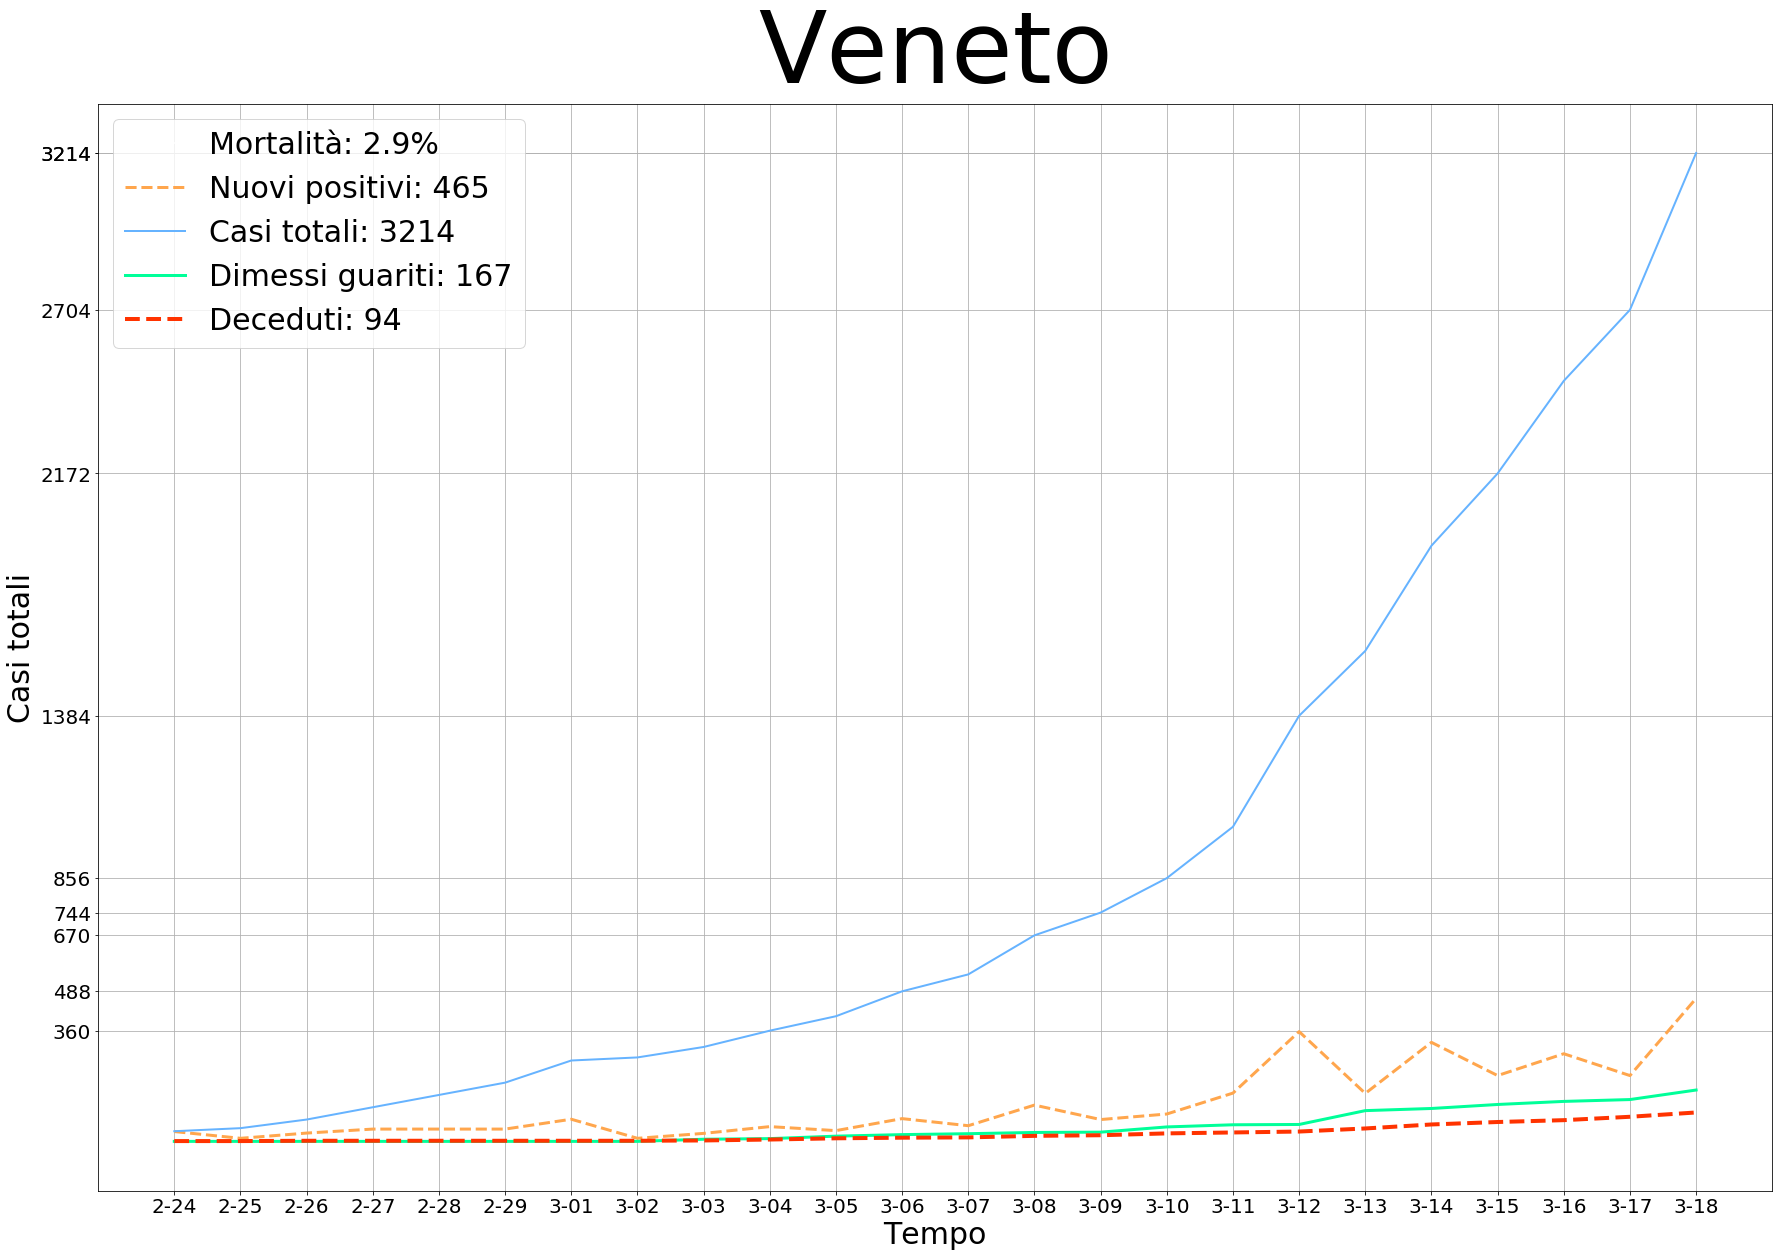

<Figure size 2160x1440 with 0 Axes>

In [13]:
# Manipolazione lista regioni per ottenere i dati raggruppati per regione.

for z in regione_tot:
    regione = df.loc[df['denominazione_regione'] == z]
    x1 = regione.data
    x2 = regione.totale_casi
    x3 = regione.terapia_intensiva
    x4 = regione.deceduti
    x5 = regione.dimessi_guariti
    x6 = regione.nuovi_attualmente_positivi
    ticks = []
    ticks_1 = []
    
    x = []
    for f in x1:
        x.append(f[6:10])
    
    legenda_casi_totali = []
    for casi in x2:
        legenda_casi_totali.append(casi)
        
    for w in legenda_casi_totali:
        if w % 2 == 0:
            ticks.append(w)
        else:
            pass
    
    
    legenda_terapia_intensiva = []
    for casi in x3:
        legenda_terapia_intensiva.append(casi)
        
    legenda_deceduti = []
    for casi in x4:
        legenda_deceduti.append(casi)
    
    legenda_guariti = []
    for casi in x5:
        legenda_guariti.append(casi)
    
    legenda_nuovi_positivi = []
    for casi in x6:
        legenda_nuovi_positivi.append(casi)
    
    ticks_1.append(legenda_casi_totali[-1])
    ticks.extend(ticks_1)

    
    totale_casi = regione.totale_casi
    terapia_intensiva = regione.terapia_intensiva
    deceduti = regione.deceduti
    dimessi_guariti = regione.dimessi_guariti
    nuovi_positivi = regione.nuovi_attualmente_positivi

    plt.rcParams["figure.figsize"]=30,20
    
    plt.rc('ytick', labelsize=20)
    plt.rc('xtick', labelsize=20)
    plt.rc('axes', labelsize=30)
    
    plt.title("{}".format(z), fontsize=100)
    plt.yticks(ticks)
    
    plt.xlabel("Tempo")
    plt.ylabel("Casi totali")
    
    toll_1_tot = int(legenda_casi_totali[-1])
    toll_2_tot = int(legenda_deceduti[-1])
    death_toll = (toll_2_tot/toll_1_tot)*100
    conv_deth_toll = str(death_toll)

    plt.plot(death_toll, color='#FFFFFF', label="Mortalità: {}%".format(conv_deth_toll[:3]))
    plt.plot(x, nuovi_positivi, color="#ffa64d", linewidth=3, linestyle="--", label="Nuovi positivi: {}".format(legenda_nuovi_positivi[-1]))
    plt.plot(x,totale_casi, color='#66b3ff', linewidth=2, label='Casi totali: {}'.format(legenda_casi_totali[-1]))
    #plt.plot(x,terapia_intensiva, color='#ff9900', linewidth=2, label='Terapia Intensiva: {}'.format(legenda_terapia_intensiva[-1]))
    plt.plot(x,dimessi_guariti, color='#00ff99', linewidth=3, label='Dimessi guariti: {}'.format(legenda_guariti[-1]))
    plt.plot(x,deceduti, color='#ff3300', linestyle="--", linewidth=4, label='Deceduti: {}'.format(legenda_deceduti[-1]))
    plt.legend(prop={'size': 30})
    plt.grid()
    
    # Togliendo il commento tutti i grafici verranno salvati in formato .png in locale
    # plt.savefig('Estrazioni_reg/{}.png'.format(z))
    plt.show()
    plt.clf()


In [14]:
# dati-andamento-nazionale
df_nazionale = pd.read_csv('COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

8.338700193206956
[1128, 1694, 2036, 2502, 3858, 4636, 9172, 12462, 17660, 27980, 31506, 35713]


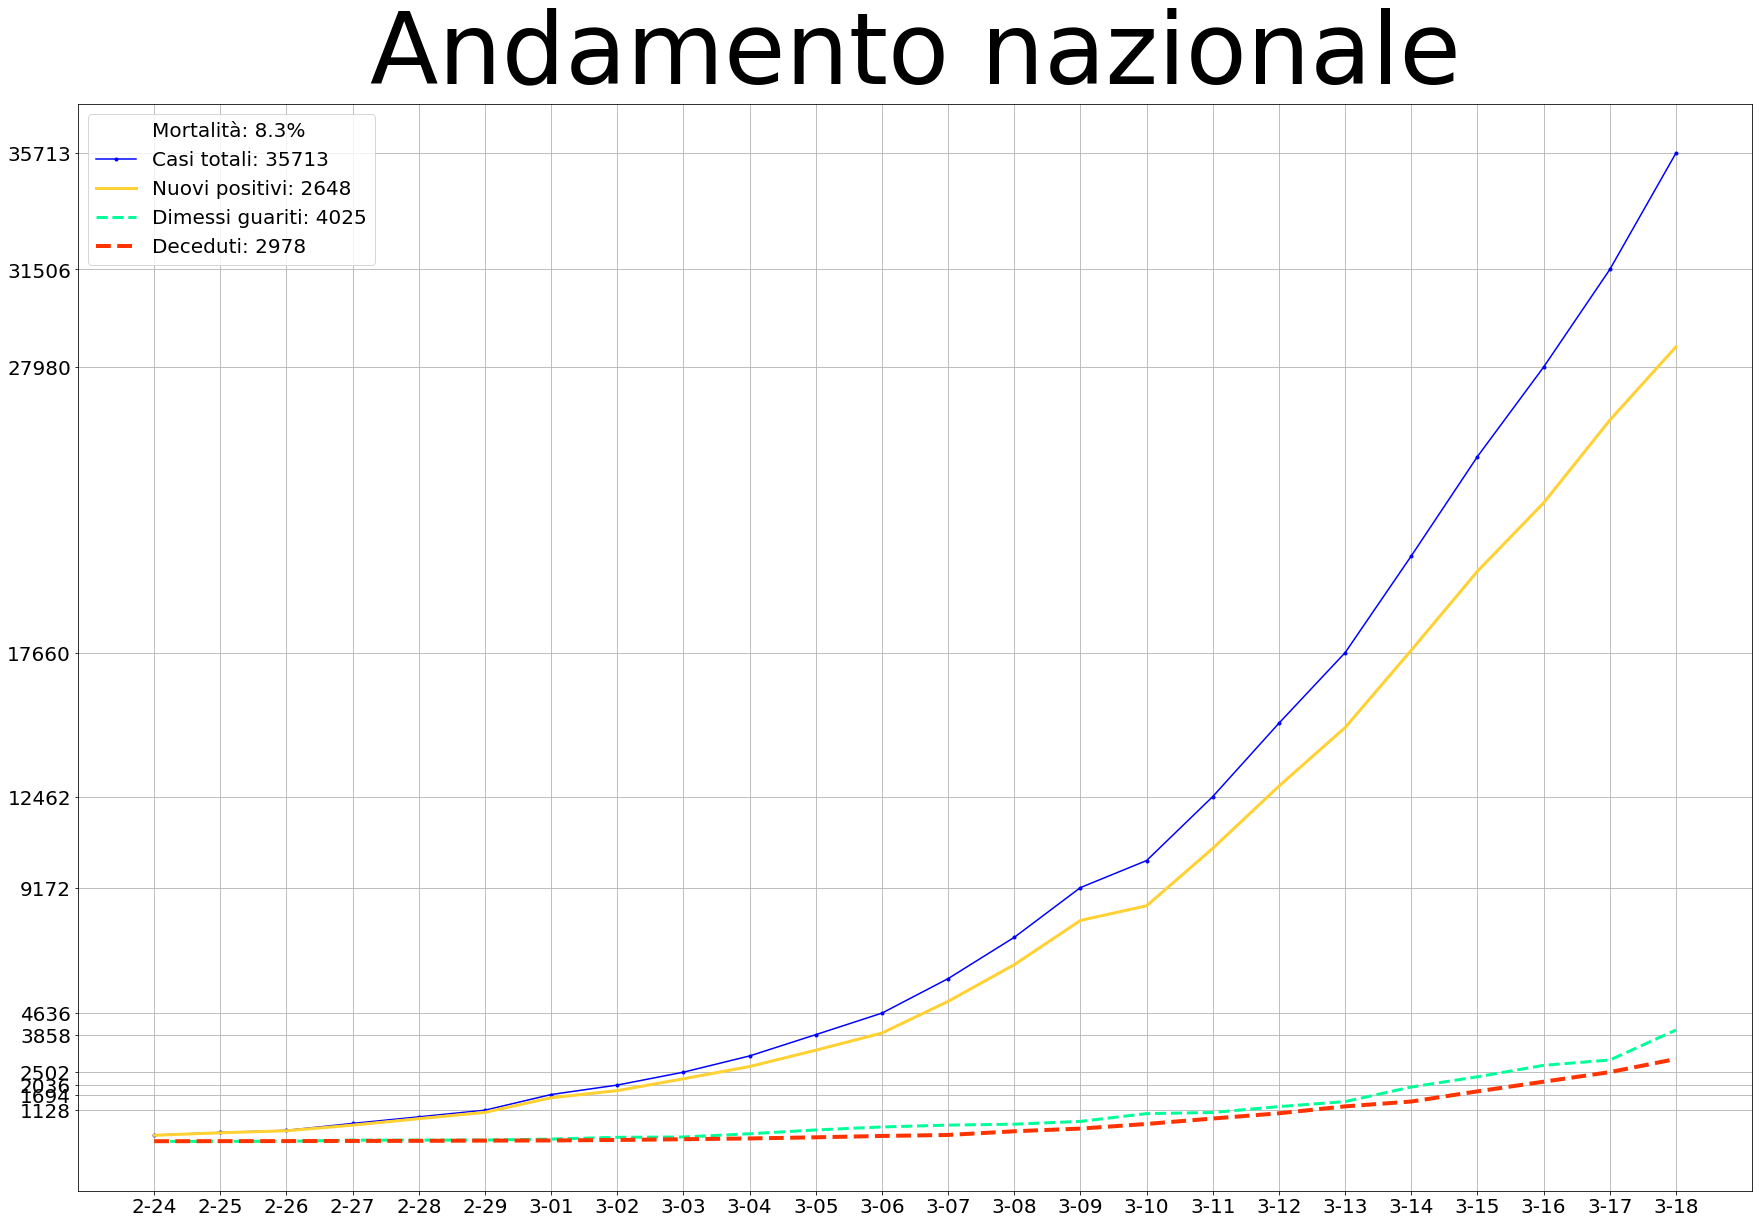

In [15]:
x1 = df_nazionale.data
x = []
for f in x1:
    x.append(f[6:10])

totale_casi = df_nazionale.totale_casi

tot_nuovi_postivi = []
tot_deceduti = []
tot_guariti = []
casi_totali = []
ticks = []
ticks_1 = []

for p in totale_casi:
    casi_totali.append(p)

for w in totale_casi:
    if w % 2 == 0 and w > 1000:
        ticks.append(w)
    else:
        pass

for w1 in df_nazionale.nuovi_attualmente_positivi:
    tot_nuovi_postivi.append(w1)

for w2 in df_nazionale.dimessi_guariti:
    tot_guariti.append(w2)

for w3 in df_nazionale.deceduti:
    tot_deceduti.append(w3)
    


ticks_1.append(casi_totali[-1])
ticks.extend(ticks_1)



nuovi_positivi = df_nazionale.totale_attualmente_positivi
totale_deceduti = df_nazionale.deceduti
totale_guariti = df_nazionale.dimessi_guariti

plt.yticks(ticks)


plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=10)

plt.rcParams["figure.figsize"]=20,20

toll_1_tot = int(casi_totali[-1])
toll_2_tot = int(tot_deceduti[-1])

death_toll = (toll_2_tot/toll_1_tot)*100
conv_deth_toll = str(death_toll)

plt.plot(death_toll, color='#FFFFFF', label="Mortalità: {}%".format(conv_deth_toll[:3]))
plt.plot(x, totale_casi, 'b.-',label='Casi totali: {}'.format(casi_totali[-1]))
plt.plot(x, nuovi_positivi, color='#FFD133', linewidth=3, label="Nuovi positivi: {}".format(tot_nuovi_postivi[-1]))
plt.plot(x, totale_guariti, color='#00ff99', linestyle="--", linewidth=3, label='Dimessi guariti: {}'.format(tot_guariti[-1]))
plt.plot(x, totale_deceduti, color='#ff3300', linestyle="--", linewidth=4, label='Deceduti: {}'.format(tot_deceduti[-1]))

plt.title("Andamento nazionale", fontsize=100)
plt.legend(prop={'size': 20})
plt.grid()



print(death_toll)
print(ticks)


## Inizo modello

[90, 74, 228, 528, 258, 428, 590, 620, 1326, 1598, 2076, 2116, 2470, 2648, 2648]
[88.59150217464034, 121.01214574898786, 86.57553452506134, 102.07513416815743, 132.08884688090737, 94.086260560249, 108.33333333333333, 392.43856332703217, 33.103879849812266, 120.51282051282051, 115.80786026200873, 184.6774193548387, 105.08474576271188, 133.18284424379232, 103.50467289719627, 165.89147286821705, 48.86363636363637, 231.57894736842107, 97.85407725321889, 114.77832512315271, 274.3243243243243, 82.22222222222221]


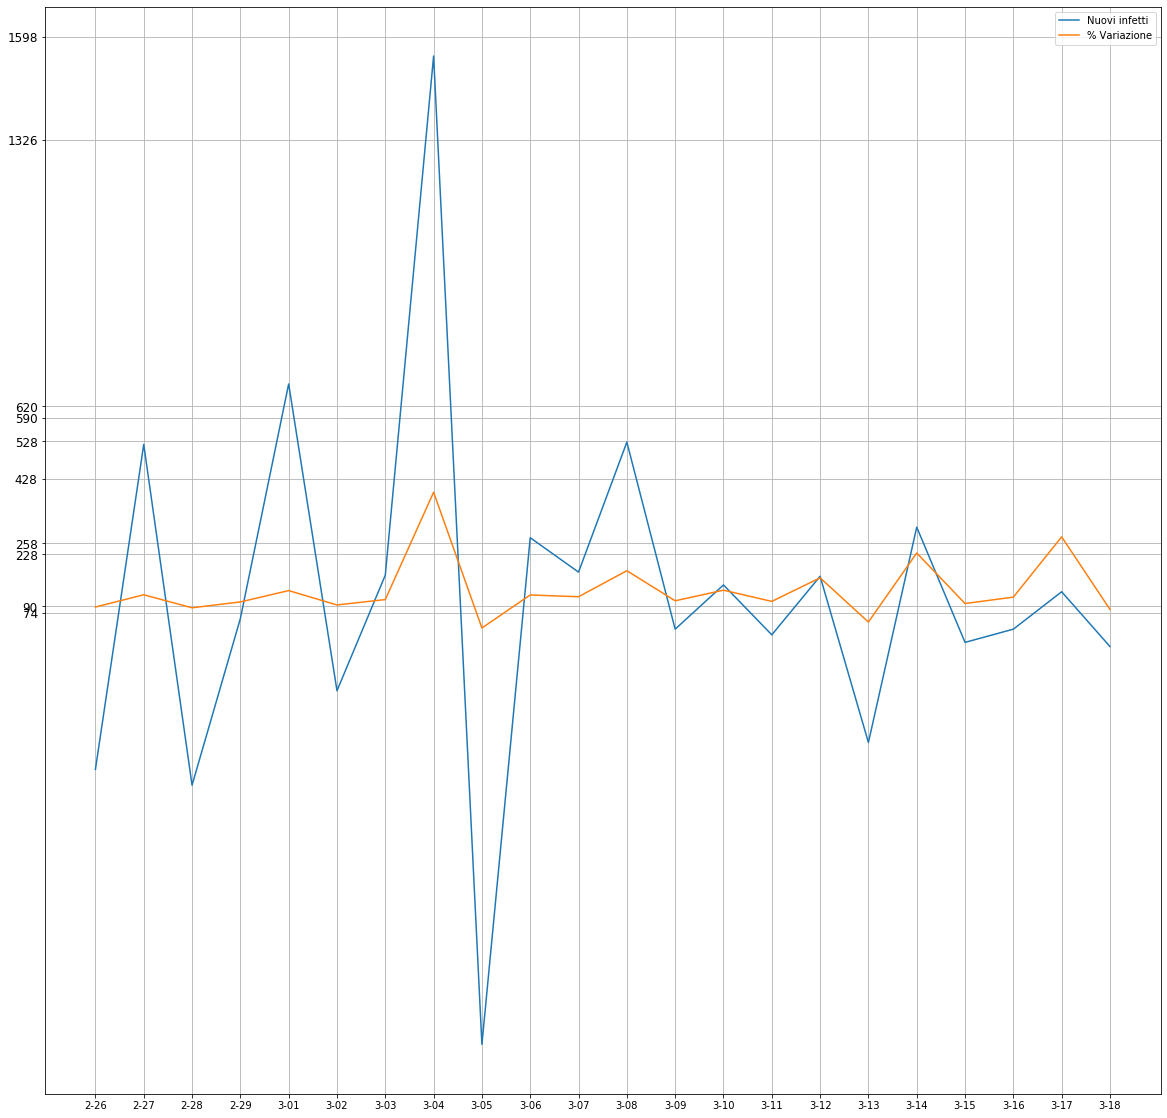

In [16]:
fcst = []
fcst_inv = []
fcst_inv_disp = []
fcst_inv_pari = []

x1 = df_nazionale.data
x2 = []
for f in x1:
    x2.append(f[6:10])

for w in range(len(tot_nuovi_postivi)):
    fcst.append(w)
    
for m in fcst:
    if m != 1 and m != 0:
        fcst_inv_pari.append(m * (-1))
    else:
        pass

for t in fcst:
    if t != 0:
        fcst_inv_disp.append(t * (-1))


res = []   
res3 = []
for q,l in zip(fcst_inv_disp, fcst_inv_pari):
    
    f = int(tot_nuovi_postivi[q])
    z = int(tot_nuovi_postivi[l])
    res1 = f - z
    res2 = (f/z)*100
    res.append(res1)
    res3.append(res2)

model = []
last = []

for ext in tot_nuovi_postivi:
    if ext % 2 == 0:
        model.append(ext)
    else:
        pass

last.append(tot_nuovi_postivi[-1])
model.extend(last)

print(model)

adapt = x[2:]
print(res3)


plt.yticks(model)



plt.plot(adapt, res, label="Nuovi infetti")
plt.plot(adapt, res3, label= "% Variazione")
plt.legend()
plt.grid()
plt.show()

In [17]:
df_cina = pd.read_csv('full_data.csv')

In [18]:
df_cina.columns

Index(['date', 'location', 'new_cases', 'new_deaths', 'total_cases',
       'total_deaths'],
      dtype='object')

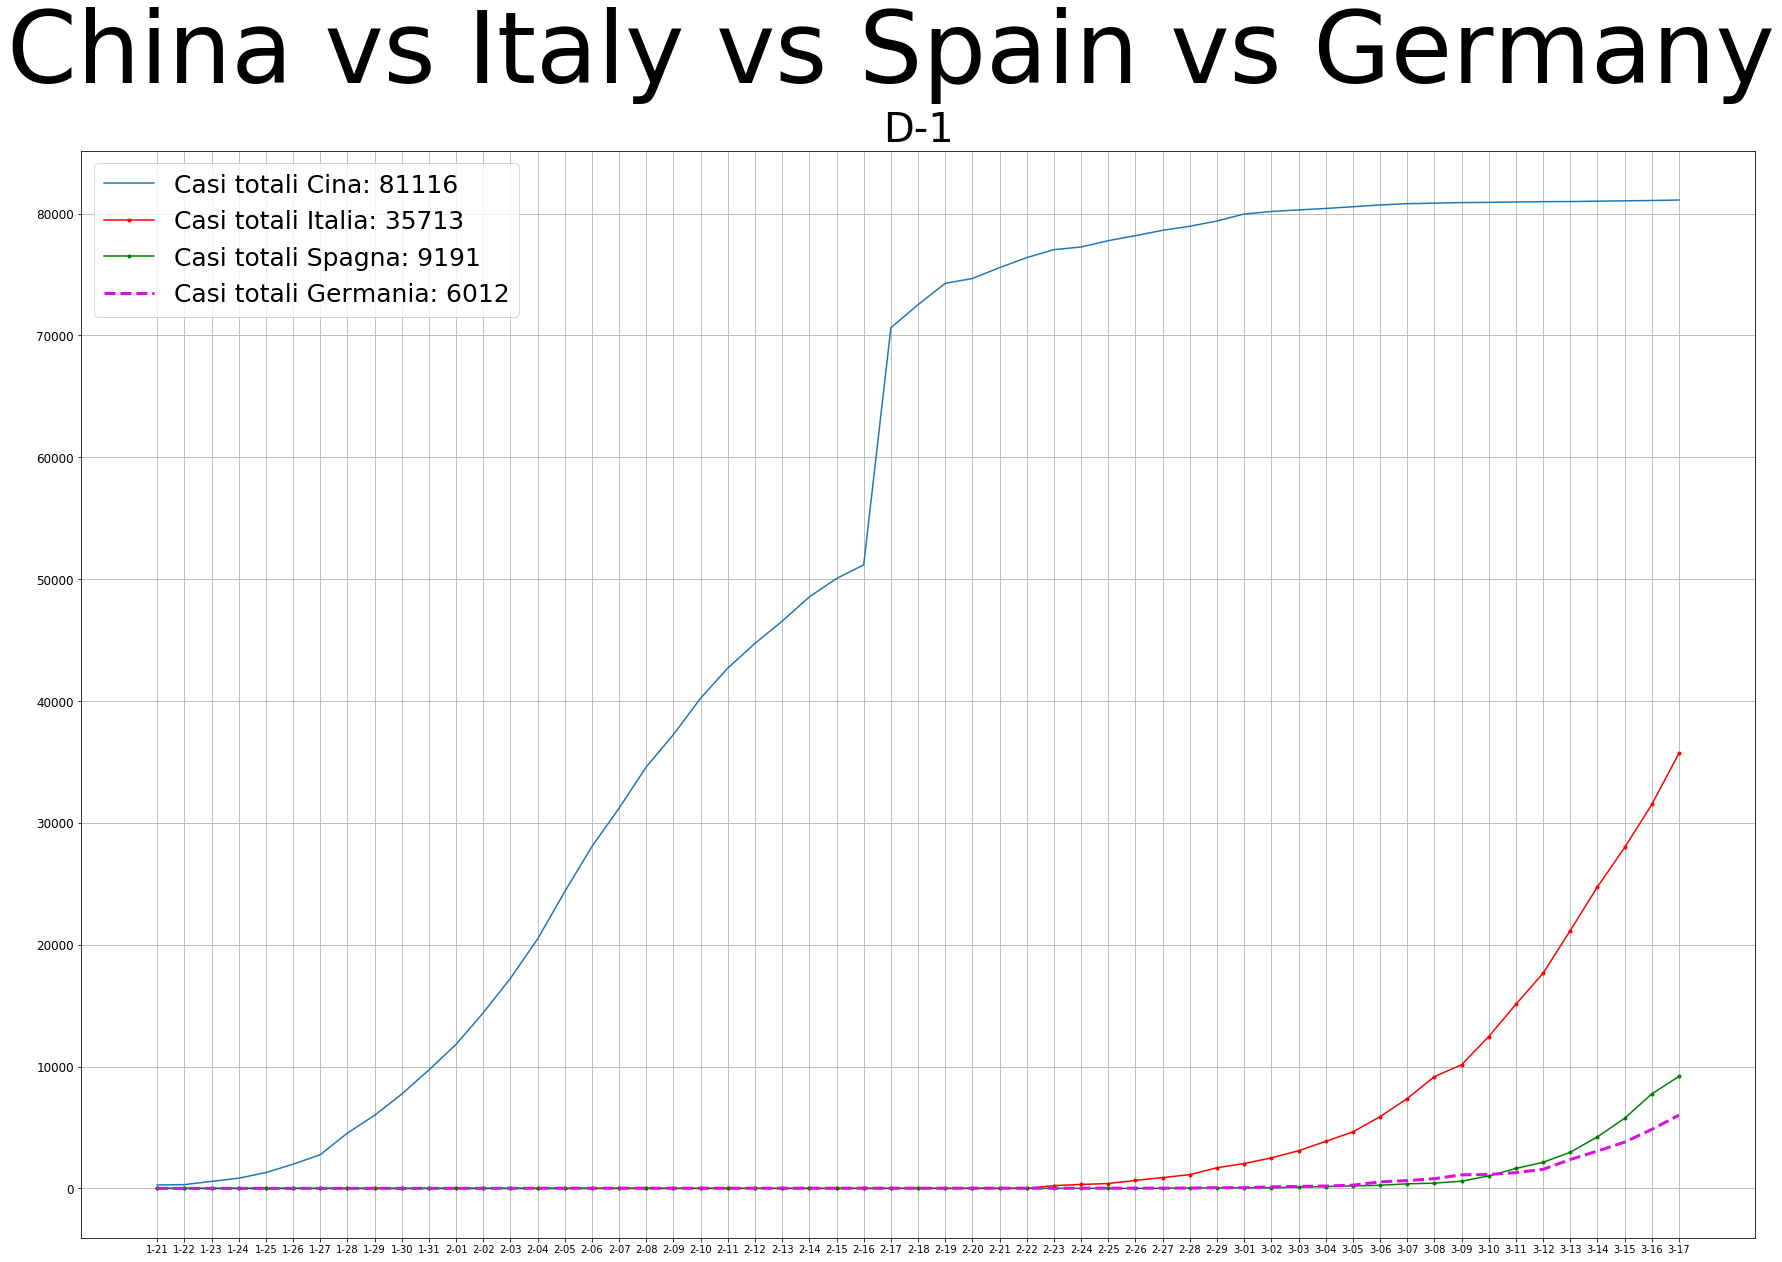

In [20]:
cina_totale = df_cina.loc[df_cina['location'] == 'China']

spain_totale = df_cina.loc[df_cina['location'] == 'Spain']

gremania_totale = df_cina.loc[df_cina['location'] == 'Germany']

cina_casi_totale = cina_totale.total_cases

cina_adapt_total = []

for t in cina_casi_totale:
    cina_adapt_total.append(t)

total_cases_cina_conv = cina_adapt_total


italy_adapt = ['1-21', '1-22', '1-23', '1-24', '1-25', 
               '1-26', '1-27', '1-28', '1-29', '1-30', 
               '1-31', '2-01', '2-02', '2-03', '2-04', 
               '2-05', '2-06', '2-07', '2-08', '2-09', 
               '2-10', '2-11', '2-12', '2-13', '2-14', 
               '2-15', '2-16', '2-17', '2-18', '2-19', 
               '2-20', '2-21', '2-22', '2-23', '2-24', 
               '2-25', '2-26', '2-27', '2-28', '2-29', 
               '3-01', '3-02', '3-03', '3-04', '3-05', 
               '3-06', '3-07', '3-08', '3-09', '3-10', 
               '3-11', '3-12', '3-13', '3-14', '3-15', 
               '3-16', '3-17'
              ]

comp = 0

deviatio = []

for pop in totale_casi:
    deviatio.append(pop)

for _ in range(33):
    deviatio.insert(0,comp)

spain = []
for x in spain_totale.total_cases:
    spain.append(x)

for _ in range(11):
    spain.insert(0, comp)
    
germania = []
for x in gremania_totale.total_cases:
    germania.append(x)

for _ in range(7):
    germania.insert(0, comp)
    

plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=10)

plt.rcParams["figure.figsize"]=30,20

plt.plot(italy_adapt, total_cases_cina_conv, label='Casi totali Cina: {}'.format(cina_adapt_total[-1]))    
plt.plot(italy_adapt, deviatio, 'r.-',label='Casi totali Italia: {}'.format(casi_totali[-1]))
plt.plot(italy_adapt, spain, 'g.-',label='Casi totali Spagna: {}'.format(spain[-1]))
plt.plot(italy_adapt, germania, color="#DC0DE6",linestyle="--",linewidth=3,label='Casi totali Germania: {}'.format(germania[-1]))


plt.suptitle("China vs Italy vs Spain vs Germany", fontsize=100)
plt.title("D-1", fontsize=40)
plt.legend()
plt.legend(prop={'size': 25})
plt.grid()


In [21]:
df_alternativo = pd.read_csv('03-18-2020.csv')

In [22]:
df_alternativo.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
df_alternativo[[]]